## Cars4U Project

### Context:

* There is a huge demand for used cars in the Indian Market today. 
* In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold.  Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply.
* In this project we will use linear regression to see the effect of various factors on Pricing of used cars.

### Attribute Information:
* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase Cities
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner : Type of ownership
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)
 

### Key-Questions to answer
* What are the predicting variables that affect the pricing of used cars?
* Does Location in which the car being sold has any effect on the price?
* Does increase in kilometers_Driven decrease the price of the car?
* Does Mileage ,Engine and Power has any effect on the pricing of the car?

### Project Objective:
* Obtain an overview of the data
* Explore and visualize the dataset using Univariate and Bivariate analysis and identify patterns and insights.
* Prepare the data for analysis
* Build a linear regression model to predict the prices of used cars.Identify key variables having strong relationship with price variable
* Perform tests for the assumptions of the linear regression
* Evaluate the model on different performance metrics - RMSE, MAE, Adjusted R-square
* Generate a set of insights and recommendations that will help the business.

### Import the necessary packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(color_codes=True) # to add nice background to the graphs
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

### Read the dataset

In [2]:
data = pd.read_csv("used_cars_data.csv")

In [3]:
#copying data to another variable to avoid changes to original data
cars = data.copy()

### View the first and last 5 rows of the dataset

In [4]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
cars.tail() # Exploring the last 5 rows of the data set

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


Observation:
* We can see that the values for Kilometers_Driven variable are at a larger scale that the other values.
* We can also see that New_Price column and also few of the Price column values are missing

### Understand the shape of the data

In [6]:
cars.shape
print(f'There are {cars.shape[0]} rows and {cars.shape[1]} columns.')  # f-string

There are 7253 rows and 14 columns.


Looking at the data ,we can see that it is safe to drop the column S.No., we can work with the default ID if needed

In [7]:
cars.drop(['S.No.'],axis=1,inplace=True)

### Check the datatypes of the columns for the dataset

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


Observations:
* There are variables like Location, Fuel_Type,Transmission,Owner_Type,Seats that need to be converted to Category datatype
* Variables like Mileage,Engine,Power,New_Price can be converted to float datatype
* Dependent Variable is Price

In [9]:
#Check the unique values in each column of the dataframe
cars.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

## Data Preprocessing

### Fixing the data types

In [10]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
cars["Seats"] = cars["Seats"].astype("category")
cars["Location"] = cars["Location"].astype("category")

In [11]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   object  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   category
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(5), float64(1), int64(2), object(5)
memory usage: 490.1+ KB


### Checking for unique values in each category column

In [12]:
for colname in cars.dtypes[cars.dtypes == 'category'].index:
    unique_value = cars[colname].unique() # extracting unique values from each category column
    print(colname,unique_value)
    print('\n\n') # adding space in between 

Location ['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', ..., 'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']
Length: 11
Categories (11, object): ['Mumbai', 'Pune', 'Chennai', 'Coimbatore', ..., 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad']



Fuel_Type ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']
Categories (5, object): ['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']



Transmission ['Manual', 'Automatic']
Categories (2, object): ['Manual', 'Automatic']



Owner_Type ['First', 'Second', 'Fourth & Above', 'Third']
Categories (4, object): ['First', 'Second', 'Fourth & Above', 'Third']



Seats [5.0, 7.0, 8.0, 4.0, 6.0, 2.0, NaN, 10.0, 9.0, 0.0]
Categories (9, float64): [5.0, 7.0, 8.0, 4.0, ..., 2.0, 10.0, 9.0, 0.0]





### Check for missing values

In [13]:
cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Observations: 
Majority of the data is missing for the New_Price column.Hence it will be better to drop this column.Also the new price of a car is determined and managed by OEMs (Original Equipment Manufacturer) which will not influence the used price of the car

In [14]:
cars.drop(['New_Price'],axis=1,inplace=True)# Dropping New_Price column

### Calculating missing values in each row

In [15]:
# counting the number of missing values per row
num_missing = cars.isnull().sum(axis=1)
num_missing.value_counts()


0    5975
1    1231
3      36
4      10
2       1
dtype: int64

In [16]:
#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = cars[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
Mileage       2
Seats         6
Price      1223
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Seats    1
Price    1
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine    10
Power     10
Seats     10
Price     10
dtype: int64





#### Since Price has the most missing values and since Price is our target variable, we will remove the rows with the missing values 

### Delete rows with missing values

In [17]:
cars.dropna(inplace=True) # Dropping missing values for all rows

In [18]:
cars.isnull().sum(axis=1).value_counts()# Verifying after dropping missing values in rows

0    5975
dtype: int64

We now have no missing values in our dataset

### Feature Engineering

#### Engine ,Power & Mileage Columns
We can see that the Engine,Power and Mileage columns are of Object data type.We need to convert them to float datatype.But before that
we need to extract the string that follows the number for each of these columns

In [19]:
cars[['Engine','Power','Mileage']].head(2)

,Engine,Power,Mileage
0,998 CC,58.16 bhp,26.6 km/kg
1,1582 CC,126.2 bhp,19.67 kmpl


For Mileage we can see we have 2 units km/kg and kmpl. Since 1 litre = 1 Kg, we donot need a convertion for the values & we  can safely remove the string km/kg & kmpl

For 'Power' column, we see some rows having 'null bhp'.We need to identify such rows and deal with them

In [20]:
cars[cars['Power']== 'null bhp']# identifying rows for 'Power' column with null bhp value

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai Santro Xing XO,Chennai,2007,79000,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,1.85
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


There are 103 such rows for the Power coulmn with value 'null bhp'.Lets Identify the idexes of such rows

In [21]:
#Identifying the indexes of rows of the Power column which has values null bhp

power_index = []
power_list = list(cars["Power"])
for i in range(len(power_list)):   
    if( power_list[i] == "null bhp"):
       power_index.append(i)
print(power_index)

[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [22]:
# Dropping the indexes with value 'null bhp' for the power column from the cars dataset
cars = cars.drop(cars.index[power_index])
cars = cars.reset_index(drop=True)# resetting index 

In [23]:
cars.shape# Checking shape of data set after dropping null bhp values

(5872, 12)

In [24]:
cars[cars['Power']== 'null bhp']# Confirming there are no rows with value 'null bhp' for the Power column

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [25]:
#Function to remove the string at the end of each value in the Engine,Power,Mileage columns and converts them to float
def column_to_num(col_val):
    """For each value, take the number before the ' '
    unless it is not a string value. This will only happen
    for NaNs so in that case we just return NaN.
    """
    if isinstance(col_val, str):
        return float(col_val.split(' ')[0])
    else:
        return np.nan

columns_to_convert = ['Engine','Power','Mileage']

for colname in columns_to_convert:
    cars[colname] = cars[colname].apply(column_to_num)

In [26]:
cars[['Engine','Power','Mileage']].head(10)

,Engine,Power,Mileage
0,998.0,58.16,26.60
1,1582.0,126.20,19.67
2,1199.0,88.70,18.20
3,1248.0,88.76,20.77
4,1968.0,140.80,15.20
5,814.0,55.20,21.10
6,1461.0,63.10,23.08
7,2755.0,171.50,11.36
8,1598.0,103.60,20.54
9,1248.0,74.00,22.30


In [27]:
cars.dtypes# Checking the datatypes of the variables after conversion

Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                category
Price                 float64
dtype: object

### Obtain a statistical summary of the dataset

In [28]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.00,2012.0000,2014.00,2016.00,2019.00
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.75,6500000.00
Mileage,5872.0,18.277839,4.365657,0.00,15.2600,18.20,21.10,33.54
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.00,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.0000,97.70,138.10,560.00
Price,5872.0,9.603919,11.249453,0.44,3.5175,5.75,10.00,160.00


In [29]:
cars.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5872,1811,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5872,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5872.0,NaN,NaN,NaN,2013.477691,3.164568,1998.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5872.0,NaN,NaN,NaN,58316.999149,92169.410006,171.0,33422.5,52609.0,72402.75,6500000.0
Fuel_Type,5872,4,Diesel,3152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5872,2,Manual,4170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5872,4,First,4839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5872.0,NaN,NaN,NaN,18.277839,4.365657,0.0,15.26,18.2,21.1,33.54
Engine,5872.0,NaN,NaN,NaN,1625.745572,601.641783,624.0,1198.0,1495.5,1991.0,5998.0
Power,5872.0,NaN,NaN,NaN,113.276894,53.881892,34.2,75.0,97.7,138.1,560.0


Observations:
* We have data from the year 1998 upto 2019
* We can see that the minimum Mileage is 0 and Max is 33.54.We will need to investigate further on the 0 Mileage
* Mumbai has the highest number of cars for sale
* Common Fuel Type is Diesel and transmission is Manual
* Most frequent owner type is First
* Most frequent number of seats is 5
* Price ranges from 0.44 lakhs to 160 lakhs

### Log Transformation

We can see that Kilometers_Driven is left skewed ,so we can do log transformation on this variable

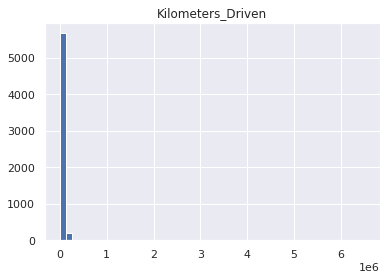

0


In [30]:
cols_to_log = ['Kilometers_Driven'] # Plotting histogram before log transformation on Kilometers_Driven column
for colname in cols_to_log:
    plt.hist(cars[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(cars[colname] <= 0))

There are no non positive or zero values for this column so log transformation would be ideal here

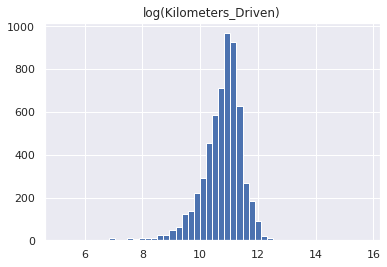

In [31]:
plt.hist(np.log(cars['Kilometers_Driven']), 50)# Plotting histogram after log transformation of the Kilometers_Driven column
plt.title('log(Kilometers_Driven)')
plt.show()

In [32]:
for colname in cols_to_log:# performing log transformation and adding to the cars data frame the transformed column
    cars[colname + '_log'] = np.log(cars[colname])
cars.drop(cols_to_log, axis=1, inplace=True)

In [33]:
cars['Kilometers_Driven_log'].head()# checking values after log transformation

0    11.184421
1    10.621327
2    10.736397
3    11.373663
4    10.613246
Name: Kilometers_Driven_log, dtype: float64

## Exploratory Data Analysis

### Univariate analysis

In [34]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Analysis of Price

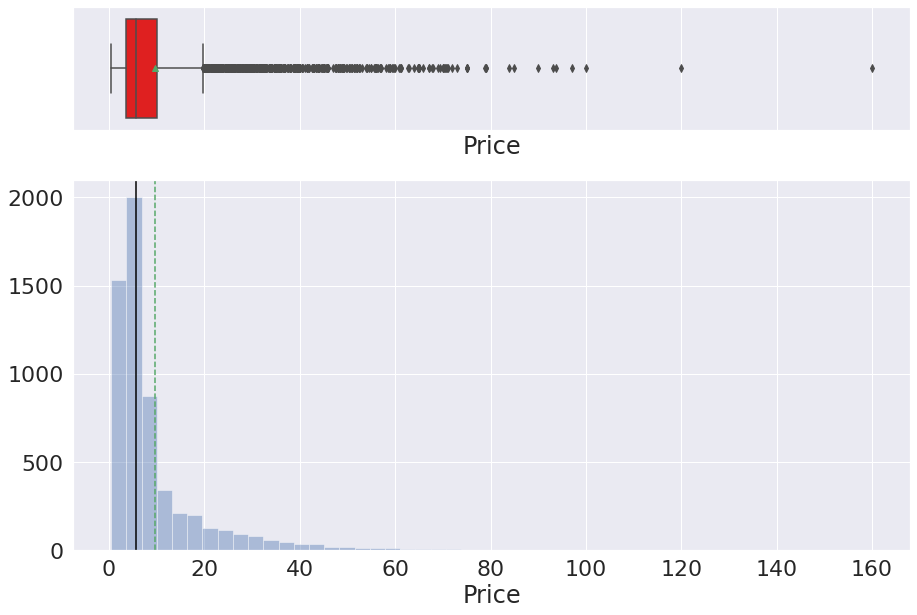

In [35]:

histogram_boxplot(cars['Price'])

We can see outliers for this variable and can see that one car specifically priced at 160 lakhs.Lets see which car is priced at this value

In [36]:
cars[cars['Price'] == 160]

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_log
3972,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,160.0,10.126631


We can see this price is for a Land Rover.

### Analysis of Year

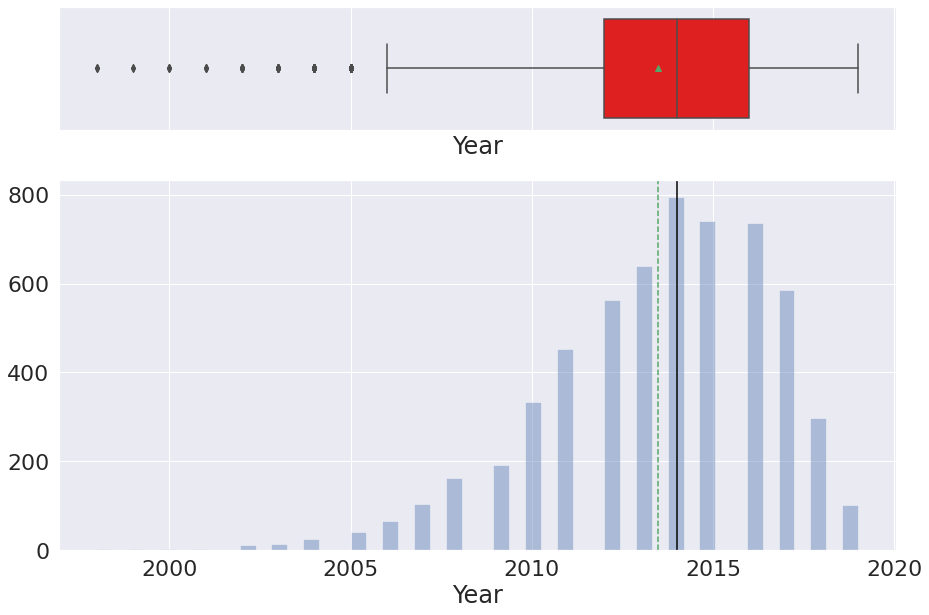

In [37]:
histogram_boxplot(cars['Year'])

Observation:
* We have more number of cars manufactured in the year 2014
* Fewer number of cars are for sale which has manufacturing year less than 2005

### Analysis of Kilometers_Driven

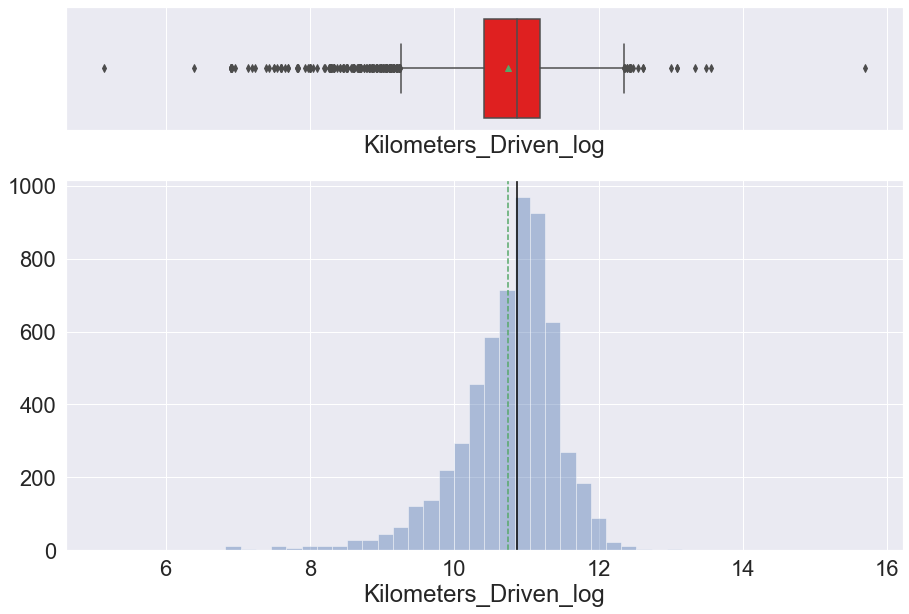

In [287]:
histogram_boxplot(cars['Kilometers_Driven_log'])

Observation:
* Most of the cars have been driven for less than 100000 Kms 

### Analysis of Mileage

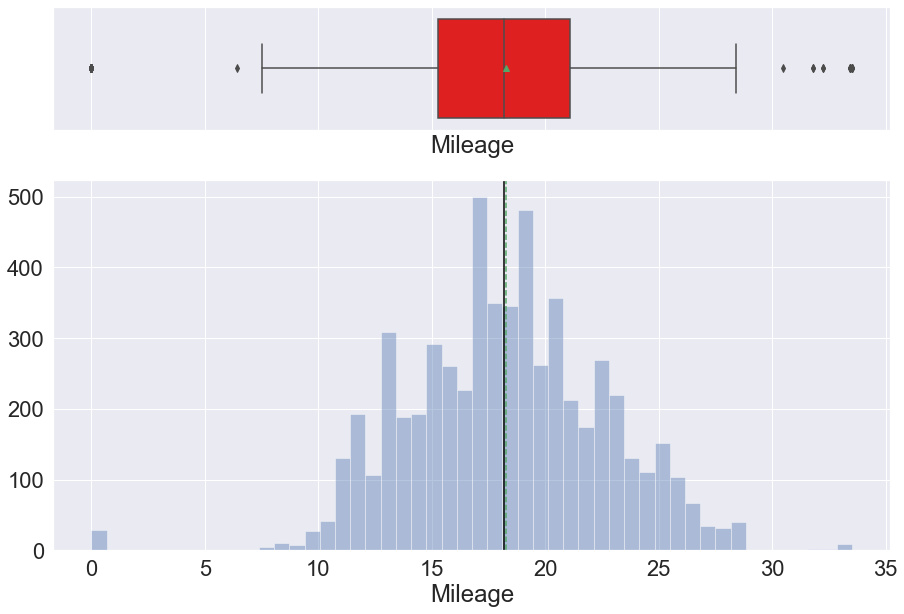

In [288]:
histogram_boxplot(cars['Mileage'])

Observations:
* We have an almost uniform distribution of data here with equal mean and median values

### Analysis of Engine

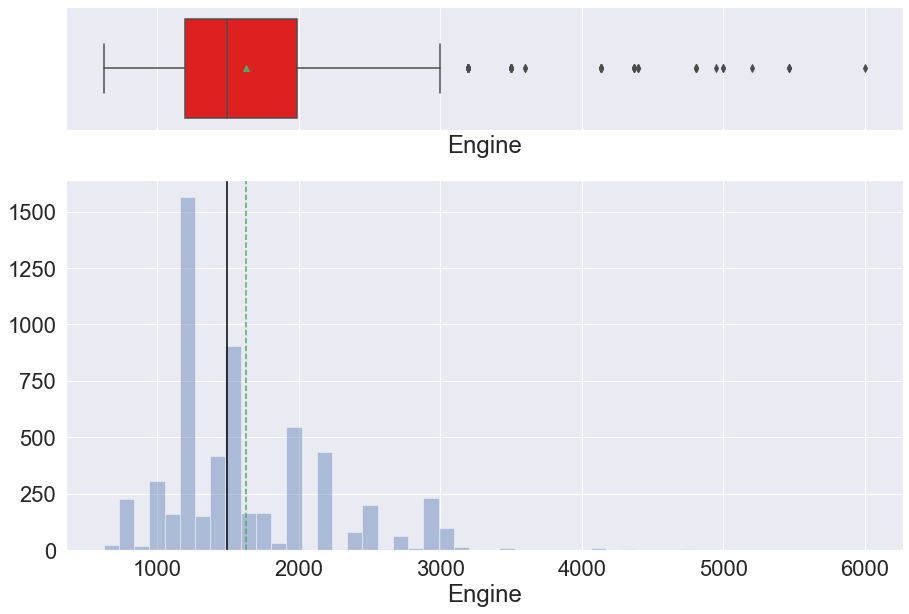

In [289]:
histogram_boxplot(cars['Engine'])

Observation:
* We can see that we have a positively skewed distribution with mean > median

### Analysis of Power

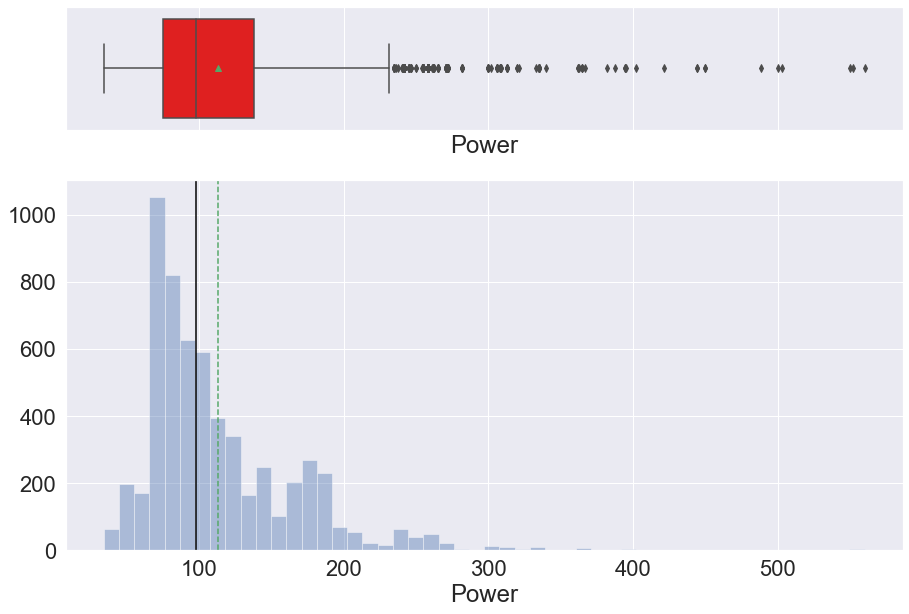

In [290]:
histogram_boxplot(cars['Power'])

Observation:
* We can see that we have a positively skewed distribution with mean > median

In [291]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 20) # annotate the percantage 
    plt.show() # show the plot

### Analysis of Location

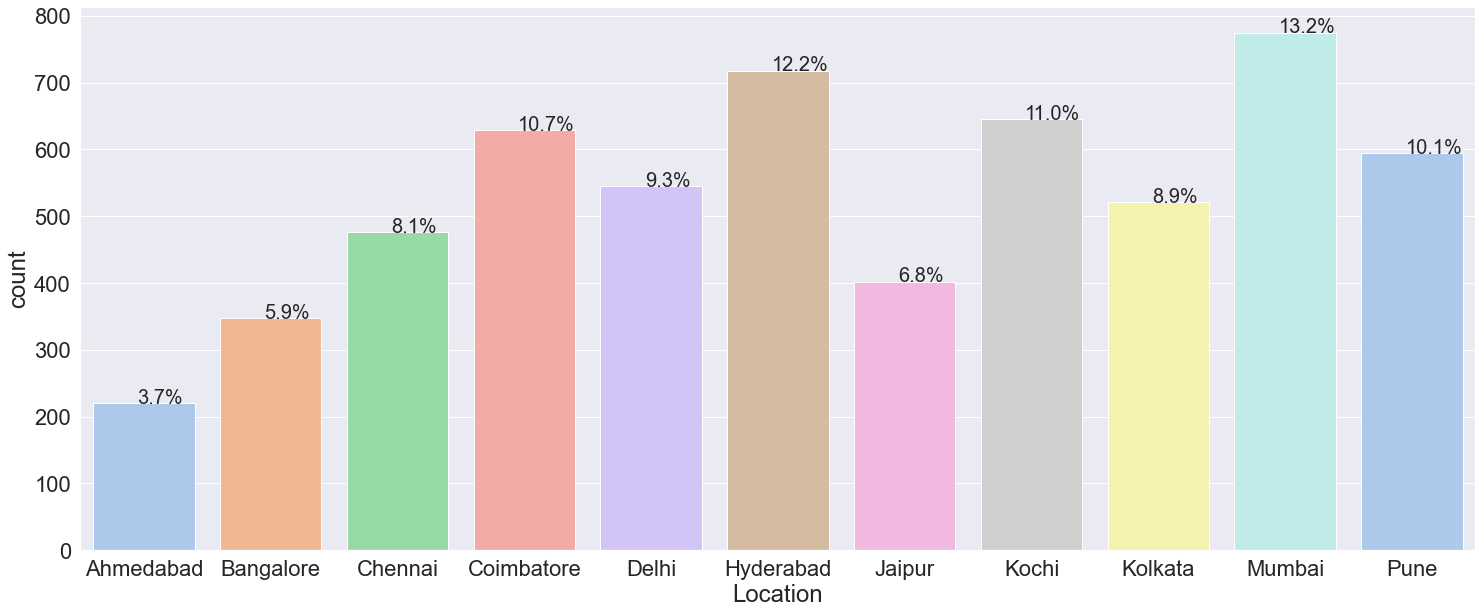

In [292]:
plt.figure(figsize=(25,10))# setting size for the plot
ax = sns.countplot(cars["Location"],palette='pastel')
perc_on_bar(ax,cars["Location"])

Observation:
* We can see that Mumbai has the most number of cars for sale followed by Hyderabad and Coimbatore

### Analysis of Fuel_Type

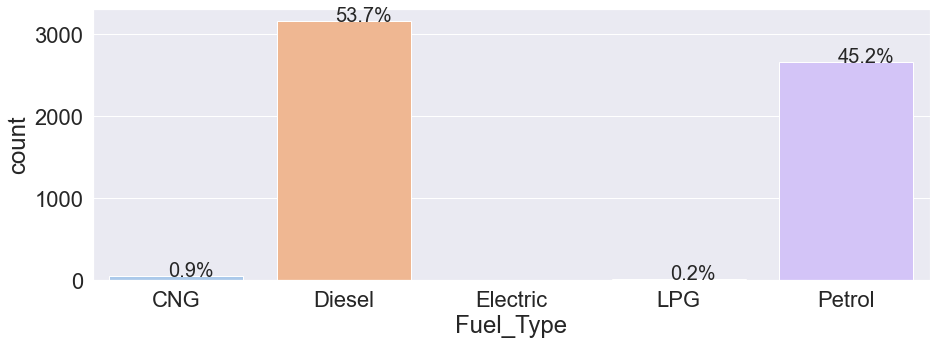

In [293]:
plt.figure(figsize=(15,5))# setting size for the plot
ax = sns.countplot(cars["Fuel_Type"],palette='pastel')
perc_on_bar(ax,cars["Fuel_Type"])

Observations:
* We can see that Diesel is the most used Fuel Type followed by Petrol
* There are very few cars using Electric Fuel_Type

### Analysis of Transmission

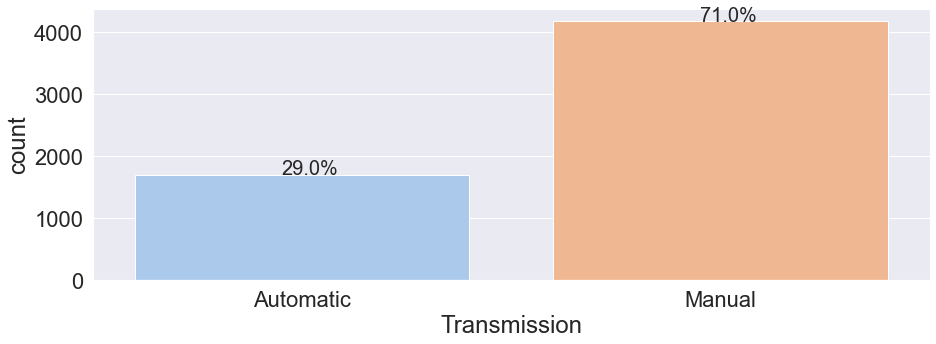

In [294]:
plt.figure(figsize=(15,5))# setting size for the plot
ax = sns.countplot(cars["Transmission"],palette='pastel')
perc_on_bar(ax,cars["Transmission"])

Observation:
* Almost 70% of the cars for sale are Manual

### Analysis of Owner Type

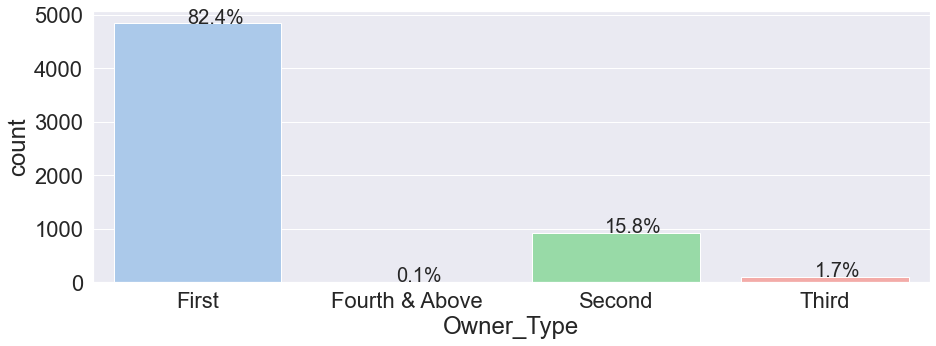

In [295]:
plt.figure(figsize=(15,5))# setting size for the plot
ax = sns.countplot(cars["Owner_Type"],palette='pastel')
perc_on_bar(ax,cars["Owner_Type"])

Observation:
* 82.3% of cars that are for sale has an owner type of First

### Analysis of Seats

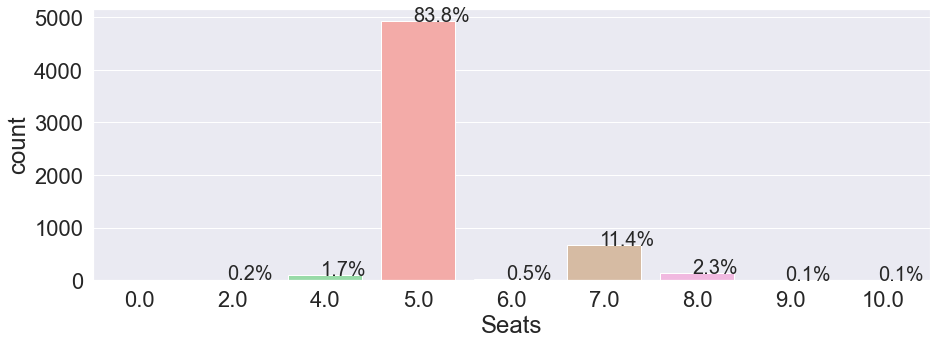

In [296]:
plt.figure(figsize=(15,5))# setting size for the plot
ax = sns.countplot(cars["Seats"],palette='pastel')
perc_on_bar(ax,cars["Seats"])

Observations:
* 83.7% of cars are 5 seater


Extracting only the Brand Names from the car Names

In [38]:
car_brand = []
def car_brand(brand):
    """For each value, take the number before the ' '
    unless it is not a string value. This will only happen
    for NaNs so in that case we just return NaN.
    """
    if isinstance(brand, str):
        return brand.split(' ')[0]
    else:
        return np.nan

name_cols = ['Name']

for colname in name_cols: # Creating a new column Car_Brand to analyse the Brands better
    cars['Car_Brand'] = cars[colname].apply(car_brand)

In [39]:
cars.head(2)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_log,Car_Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,Hyundai


In [40]:
cars["Car_Brand"] = cars["Car_Brand"].astype("category")# Converting Car_Brand to category type

### Analysis of Car Brand Names

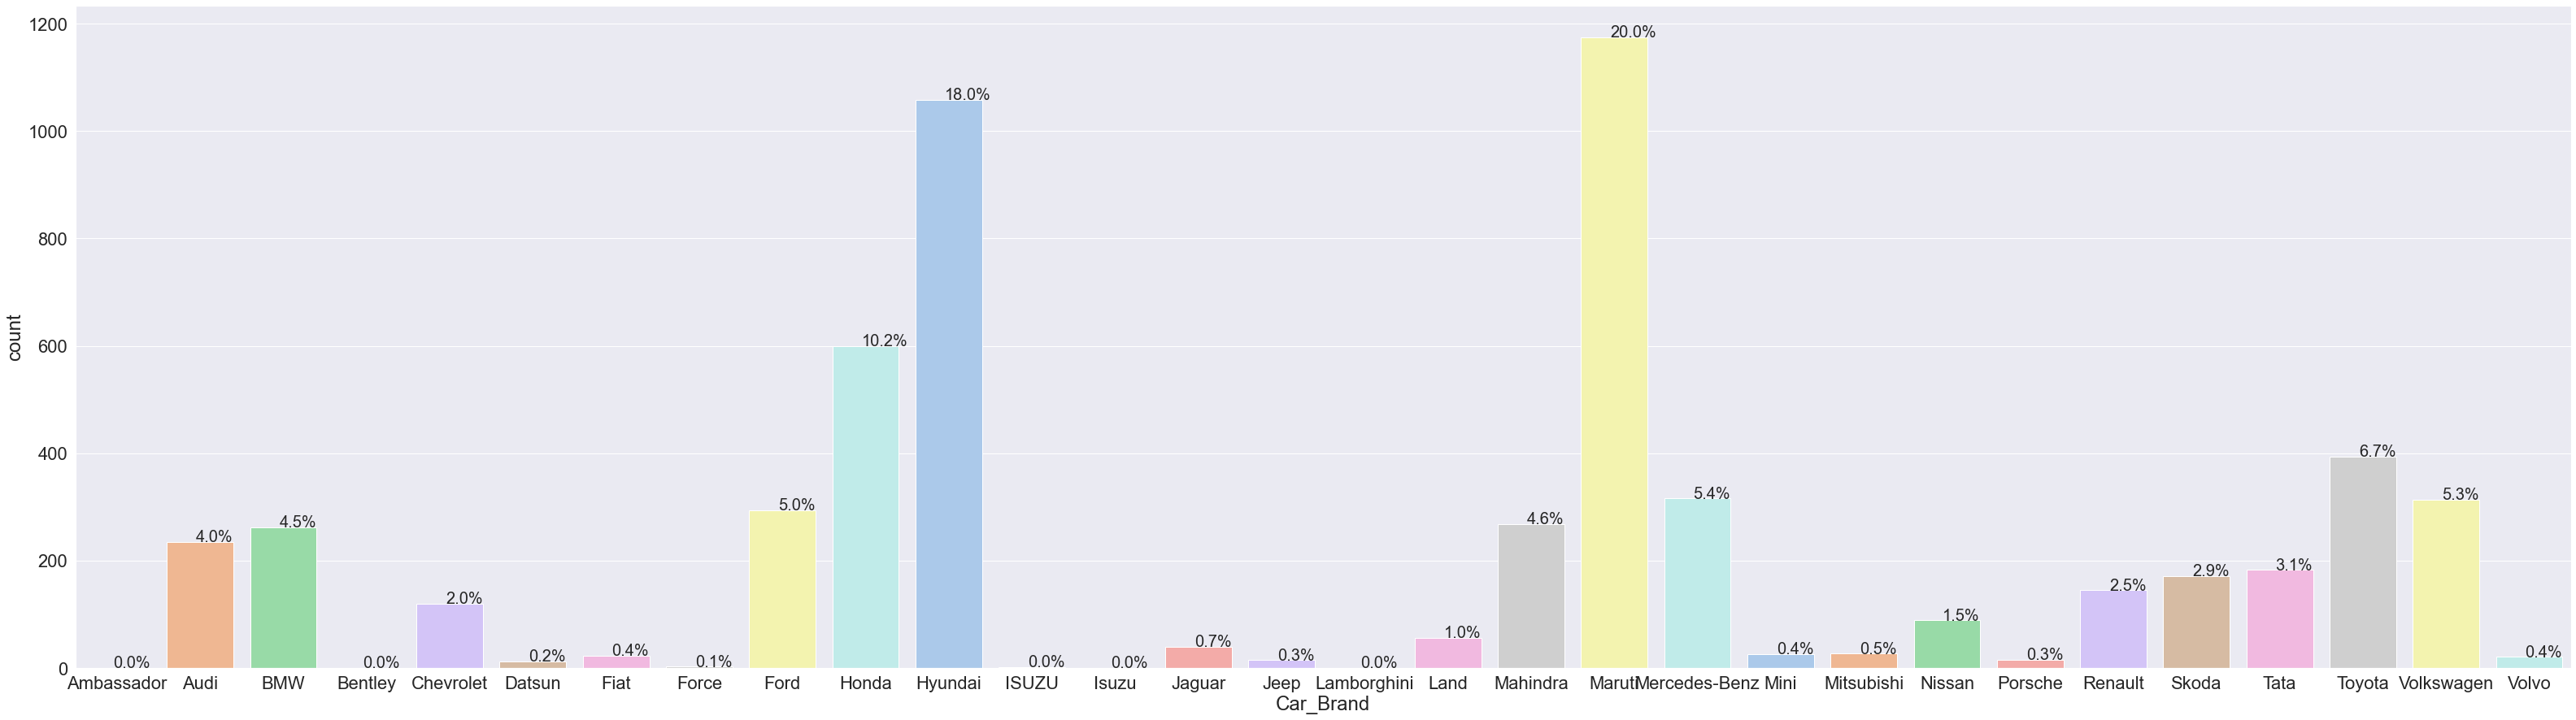

In [300]:
plt.figure(figsize=(55,15))# setting size for the plot
ax = sns.countplot(cars["Car_Brand"],palette='pastel')
perc_on_bar(ax,cars["Car_Brand"])

Observation:
* Around 20% of cars available for sale are from Maruti followed by Hyundai
* Least number of cars available for sale are from Lamborghini


### Bivariate Analysis

#### Checking the correlation of the numerical variables using a heatmap

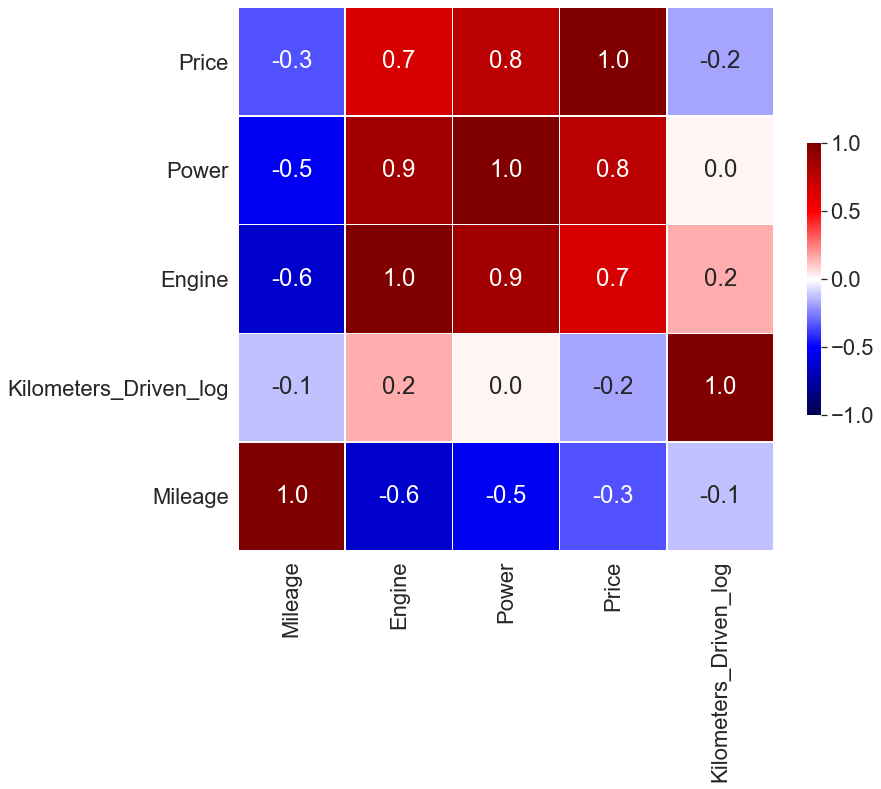

In [301]:
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Year') # dropping year column as it is temporal variable
corr = cars[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t Price  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

**Observation:**
* Price is highly positively correlated with Power and Engine which means cars with higher Power & Engine tend to be higher priced
* Price is negatively correlated with Mileage & Kilometers_Driven meaning as the value of these variables increases Price of cars will decrease
* Power and Engine has high positive correlation with each other
* Power and Engine has negative correlation with Mileage


### Analysing how Price of cars is influenced by the different variables

### Price vs Car Brands

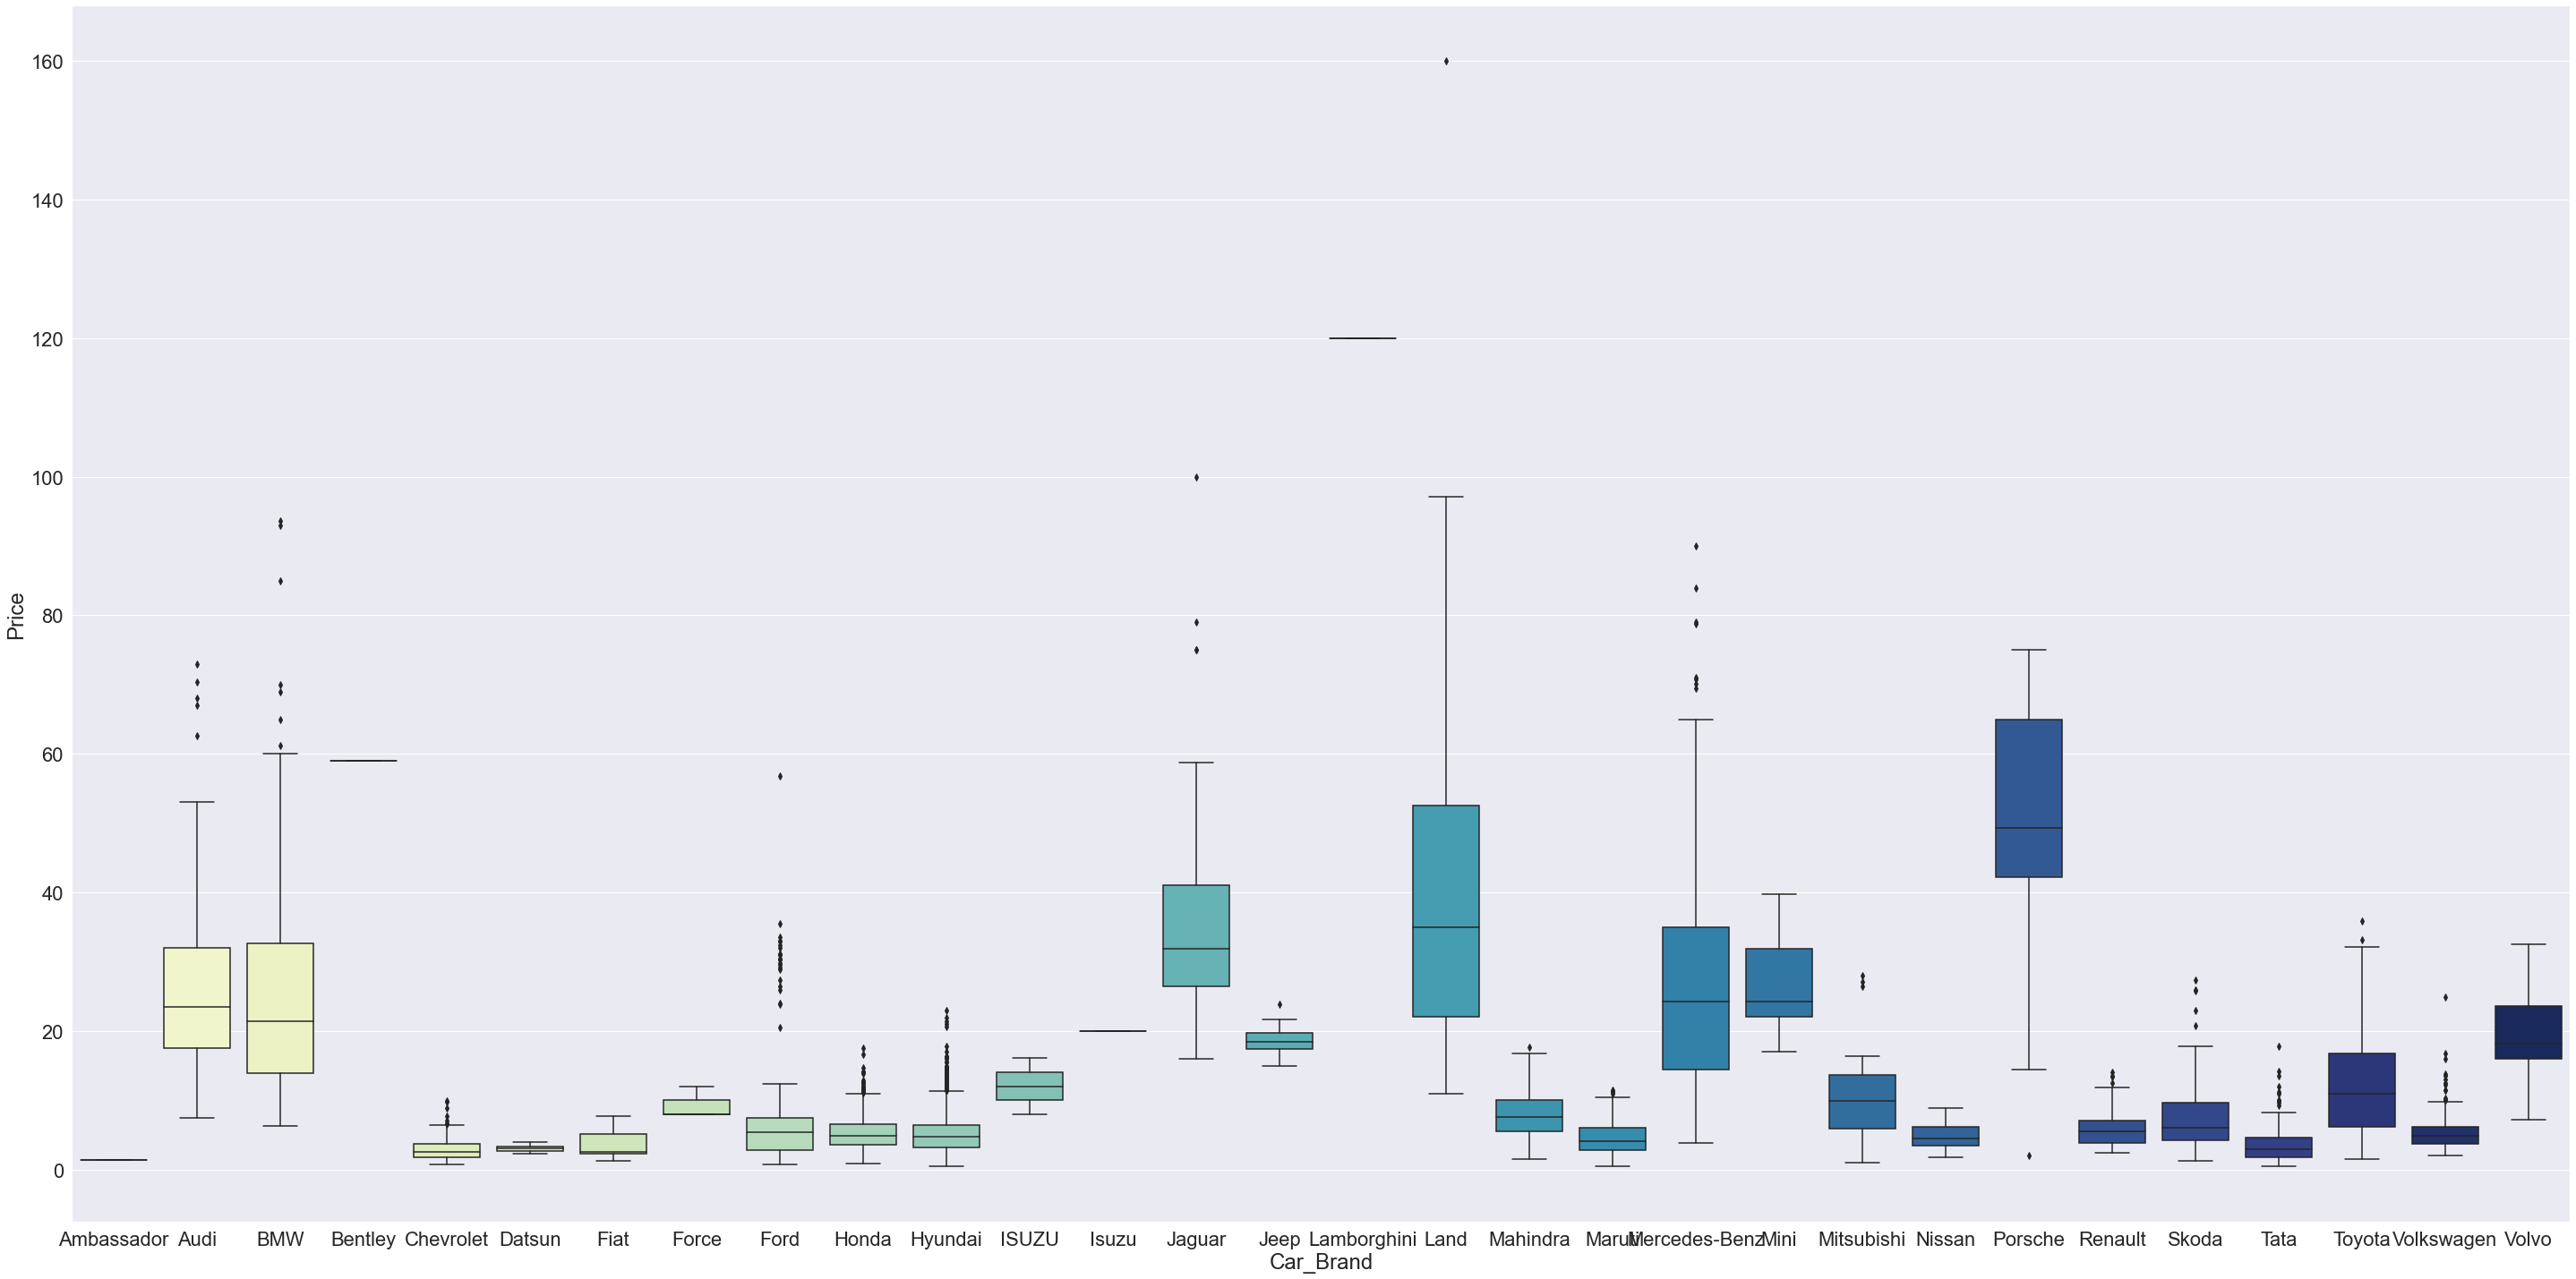

In [302]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Car_Brand"],cars["Price"],palette="YlGnBu")
plt.show()

Observation:
* We can see that Land Rovers,Porsche,Audi have the highest Price among the cars

### Price Vs Location

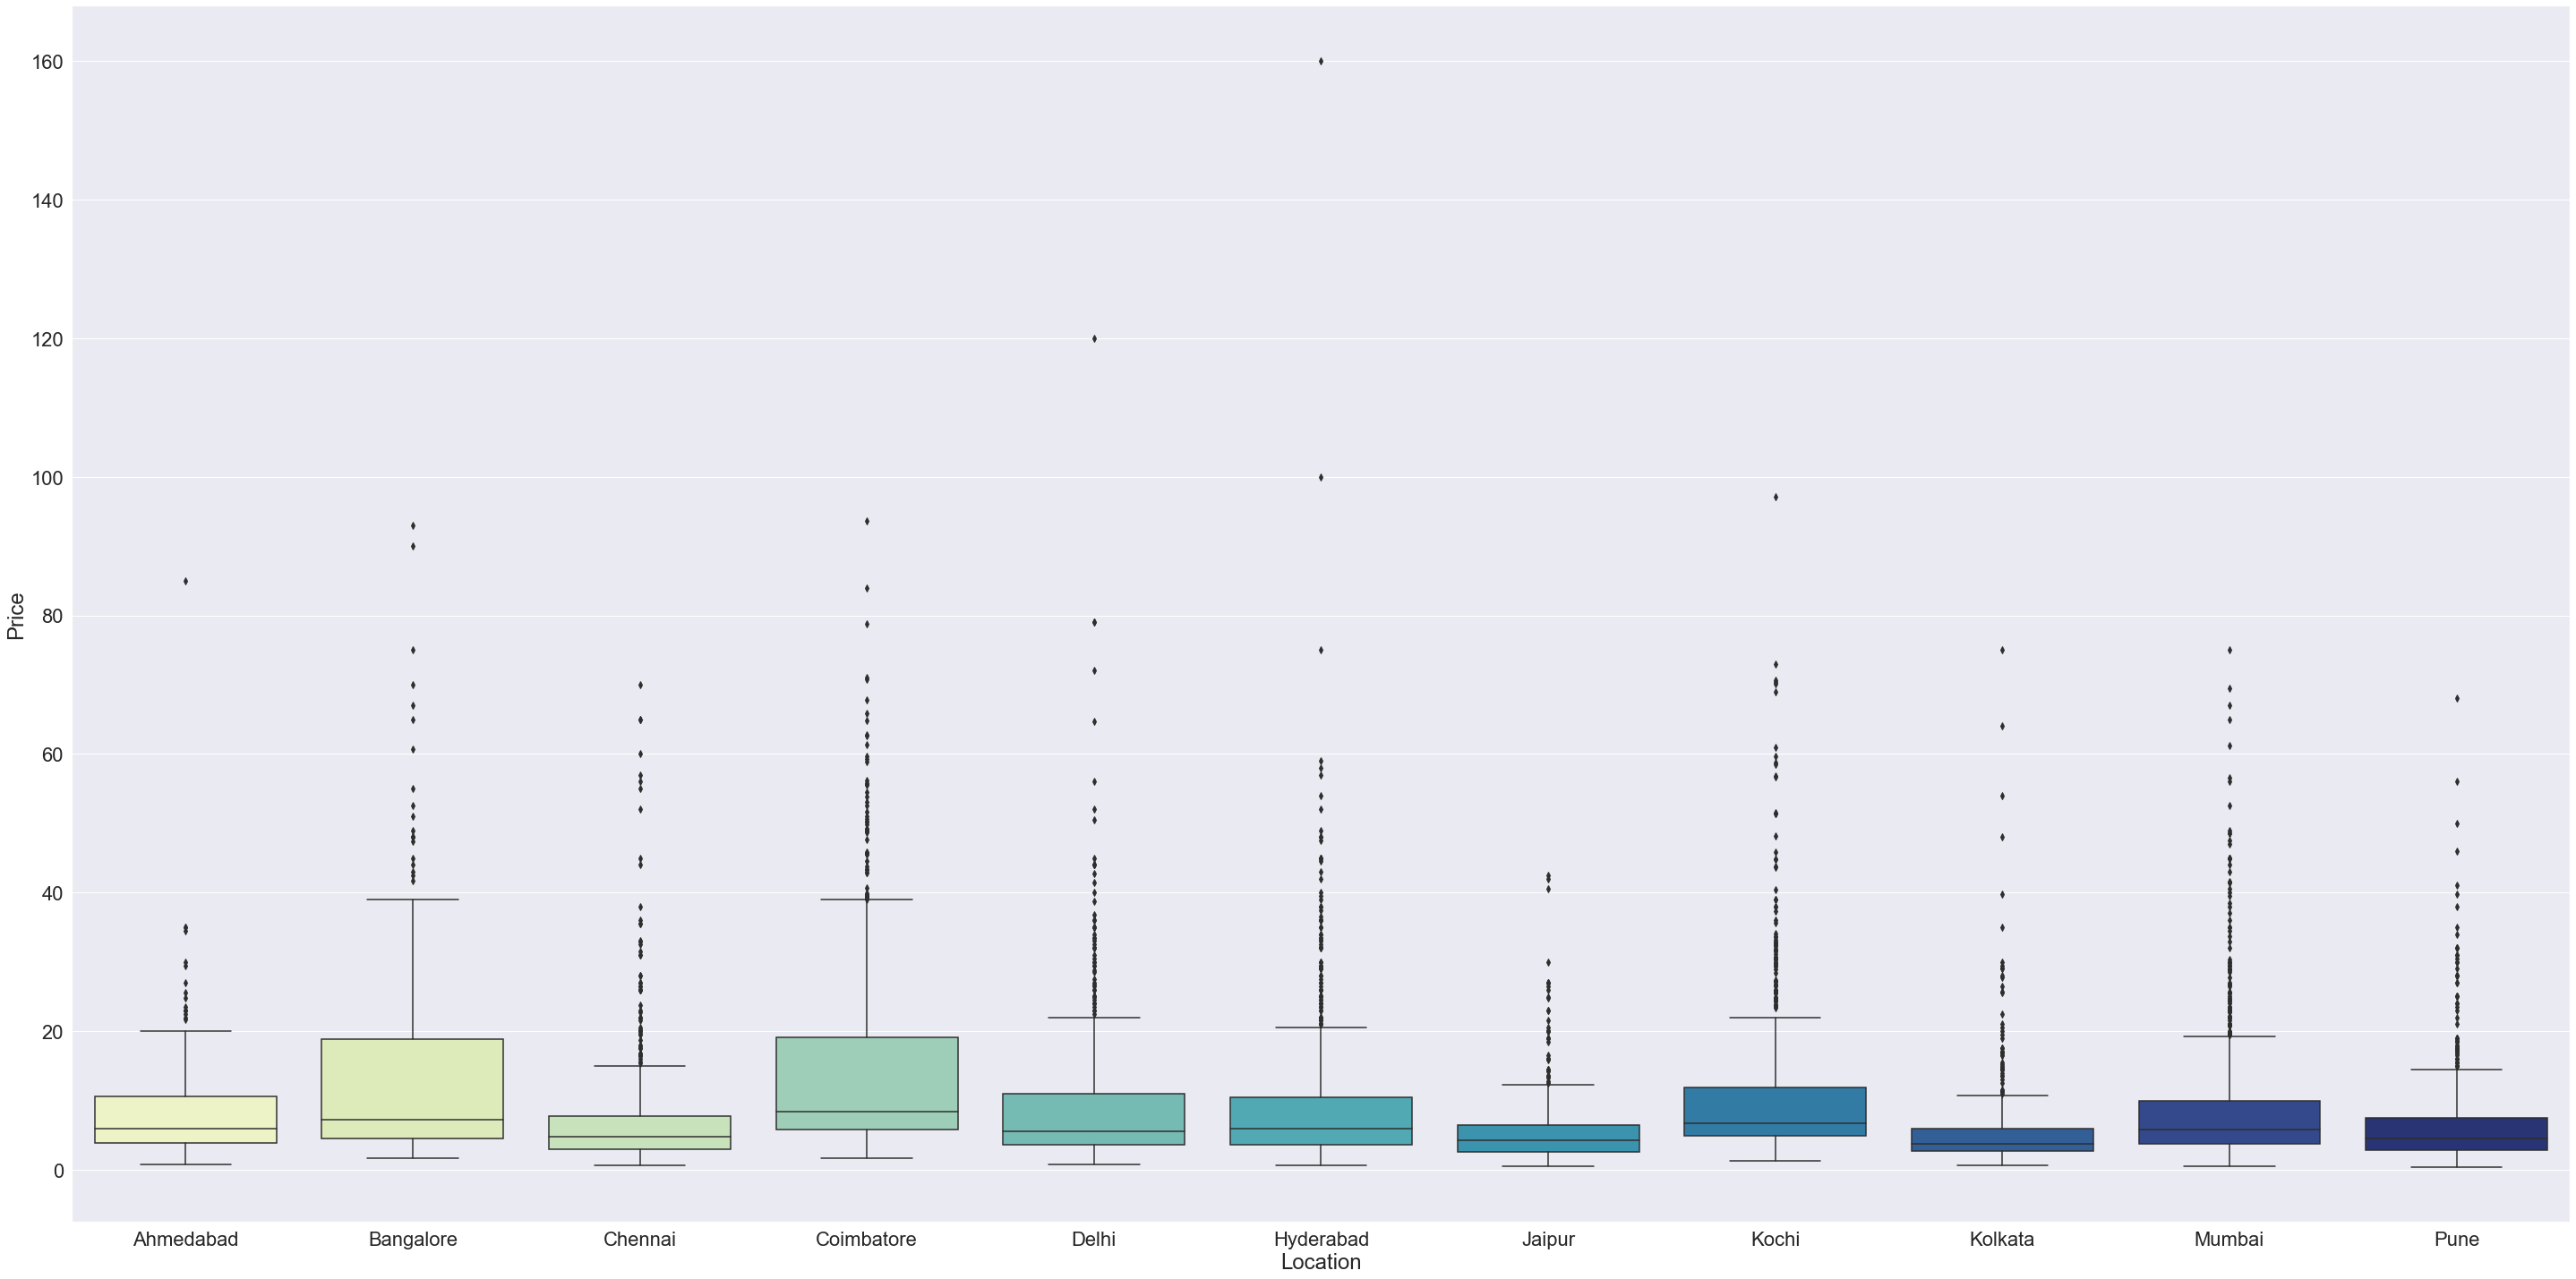

In [303]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Location"],cars["Price"],palette="YlGnBu")
plt.show()

Observation:
* Cars are being sold for higher prices in cities Coimbatore,Bangalore etc and for lesser price in cities like Jaipur,Kolkata etc

### Price vs Year

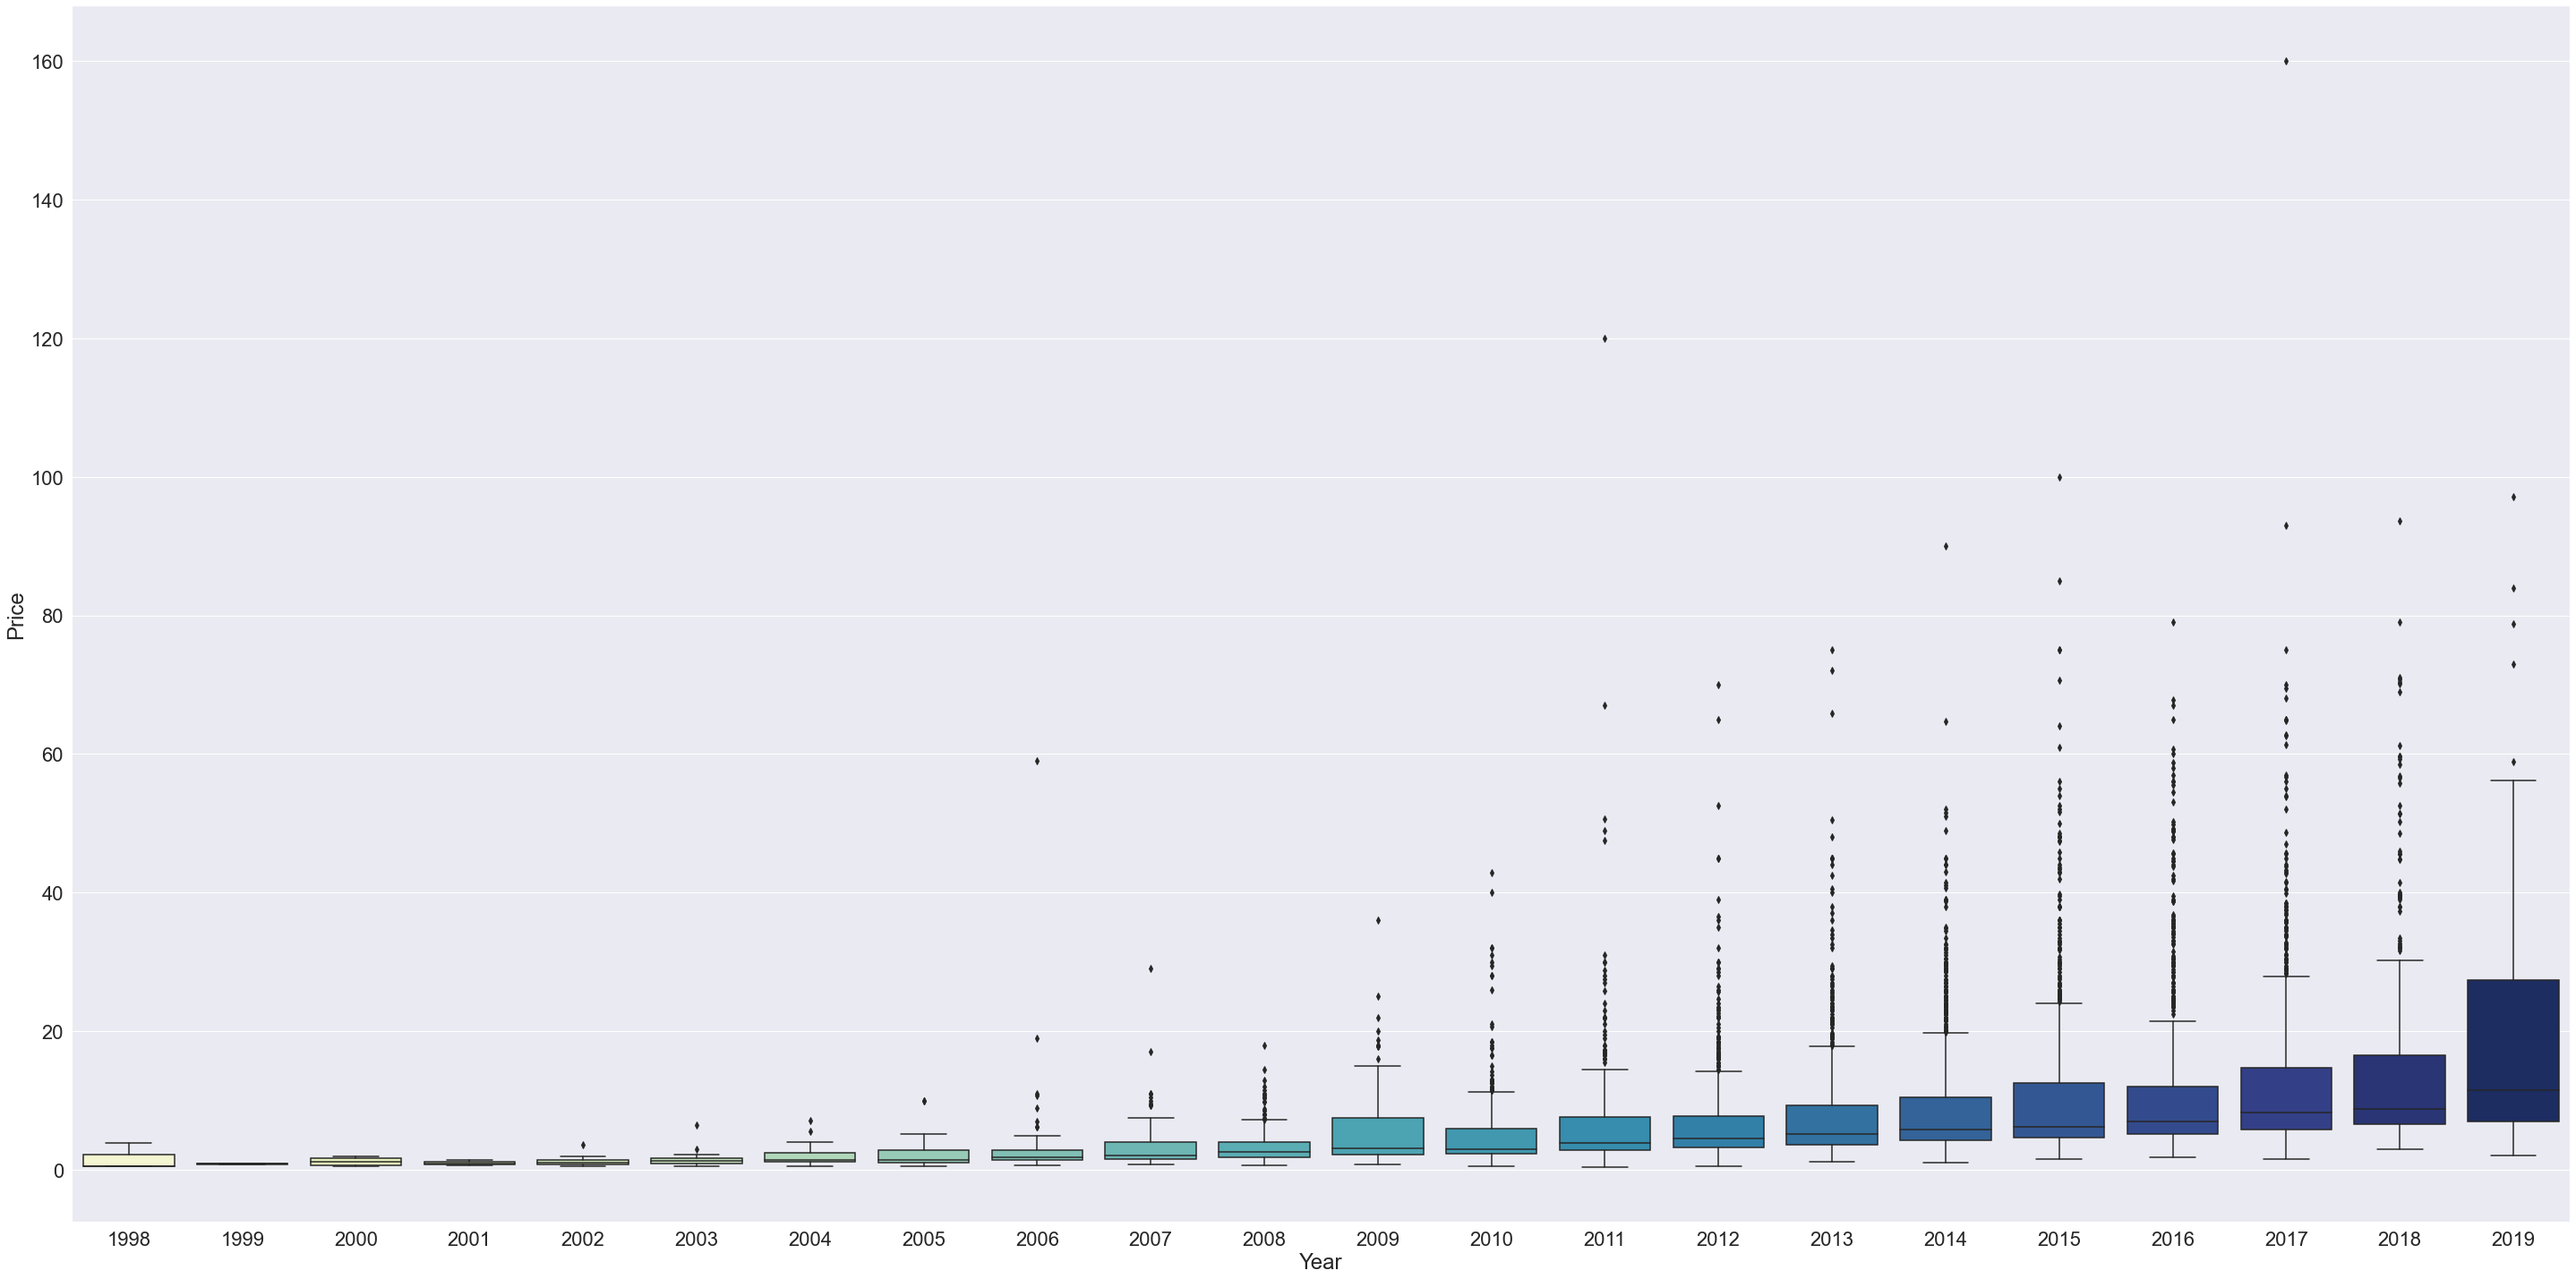

In [304]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Year"],cars["Price"],palette="YlGnBu")
plt.show()

Observations: Prices of cars tend to increase over the years

### Price vs Fuel_Type

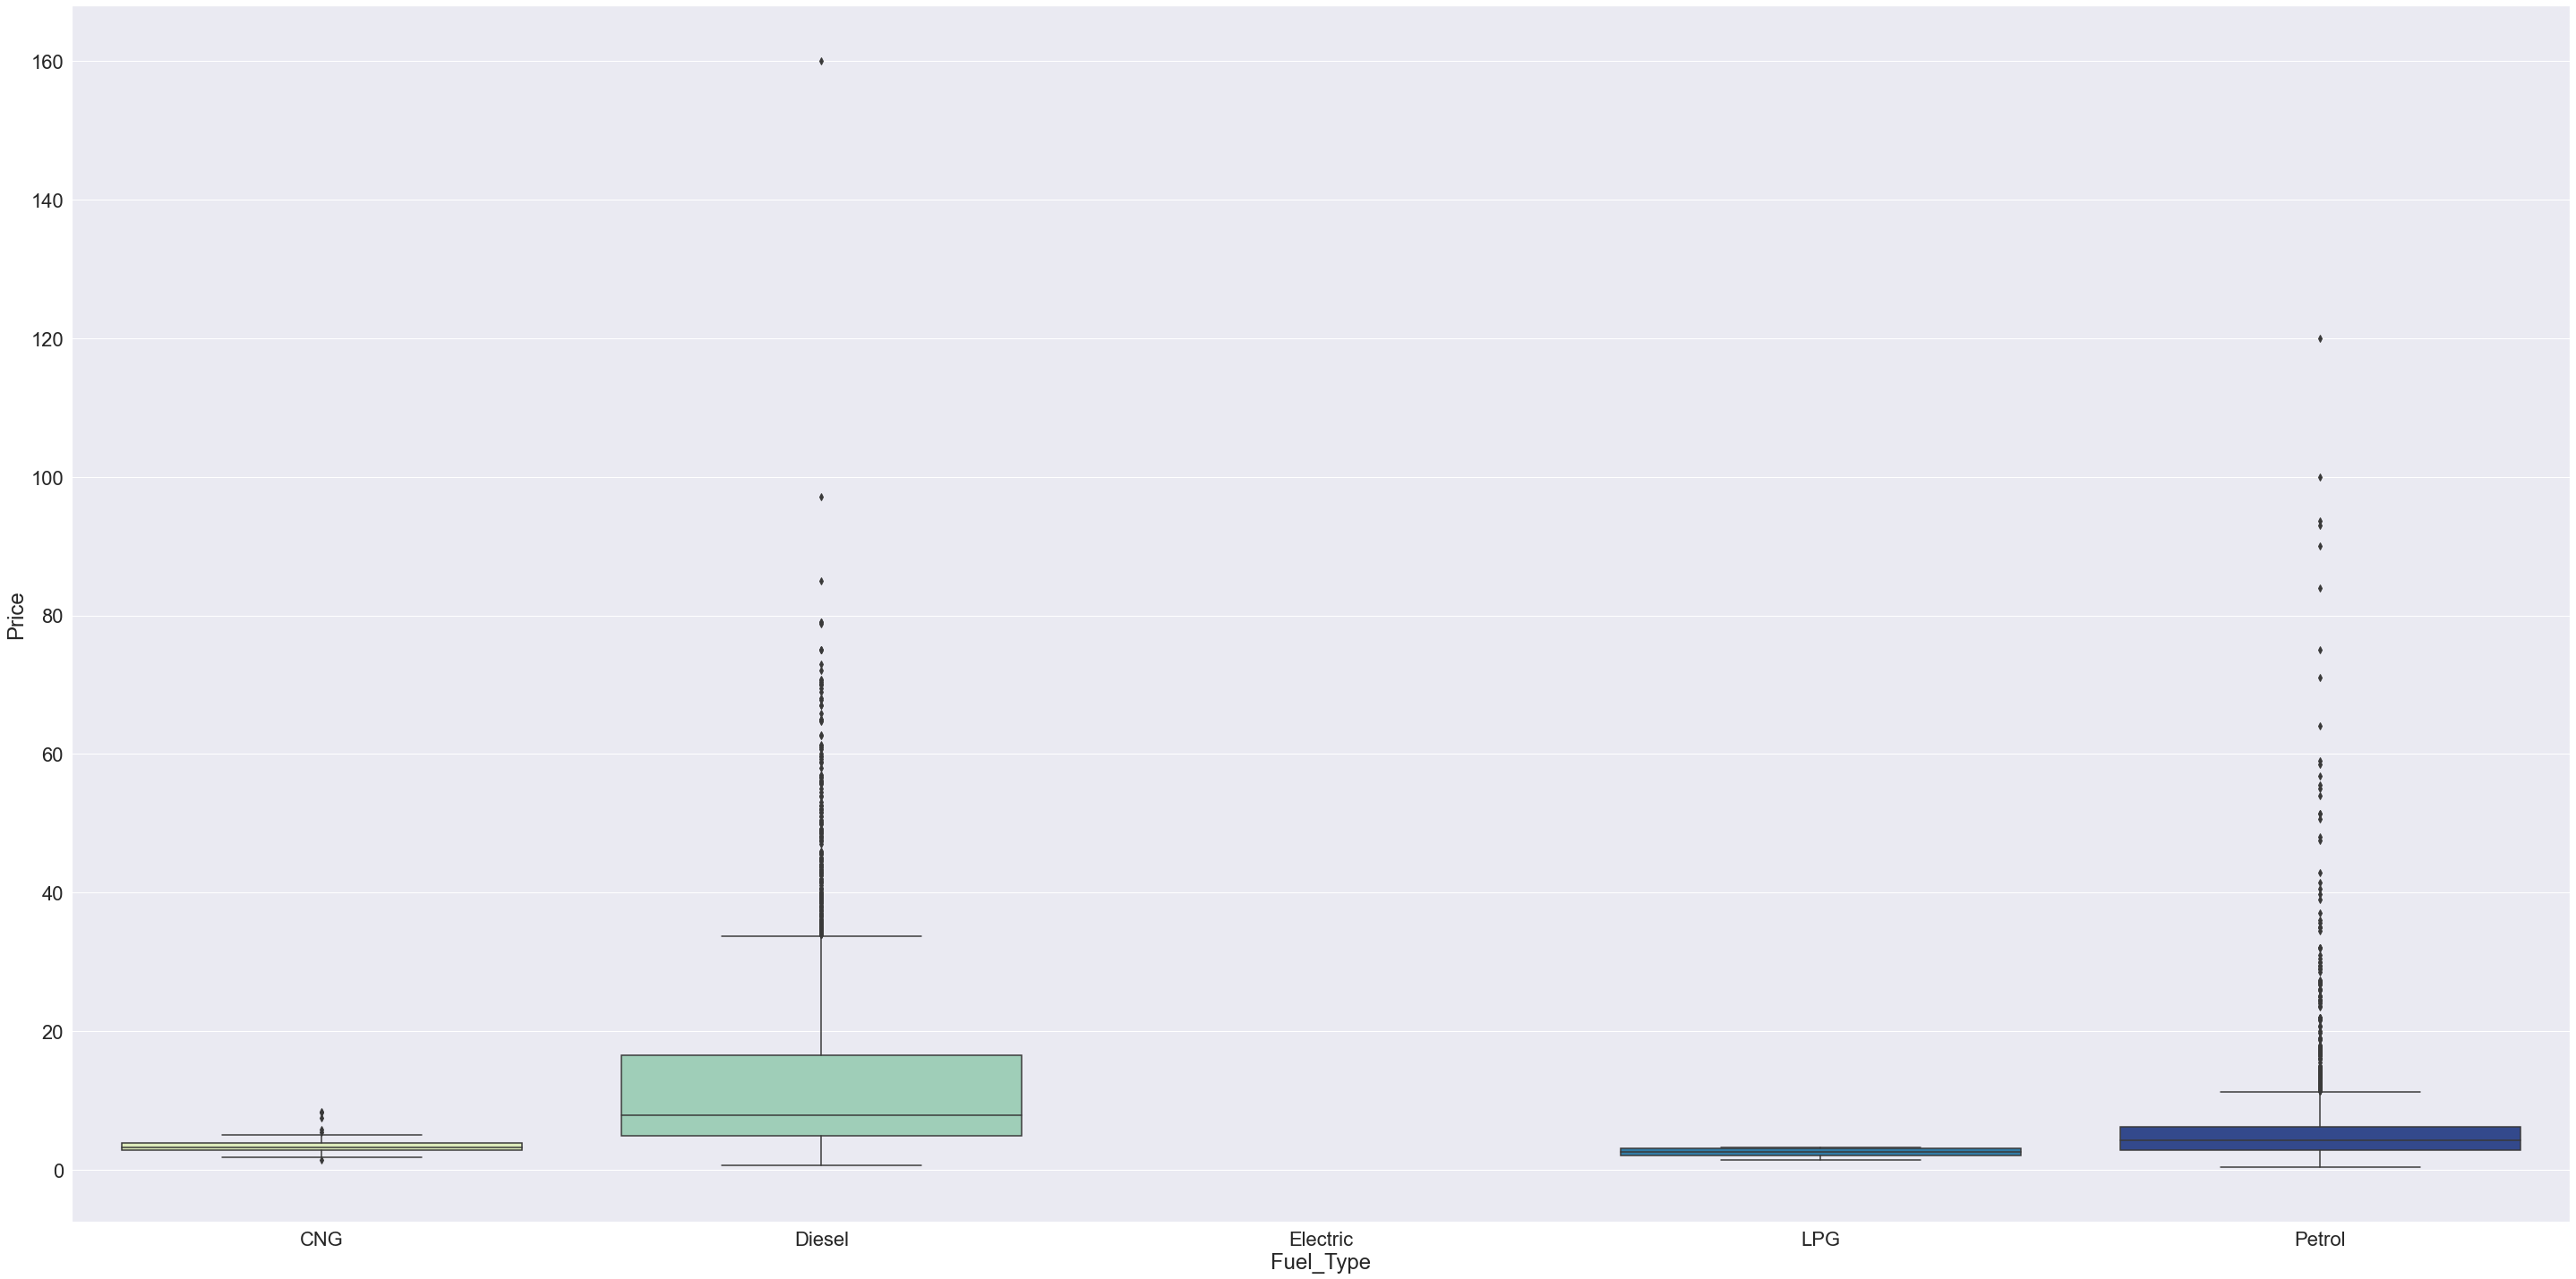

In [305]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Fuel_Type"],cars["Price"],palette="YlGnBu")
plt.show()

Observation:
* Diesel cars have higher price among all othe fuel types

### Price vs Transmission

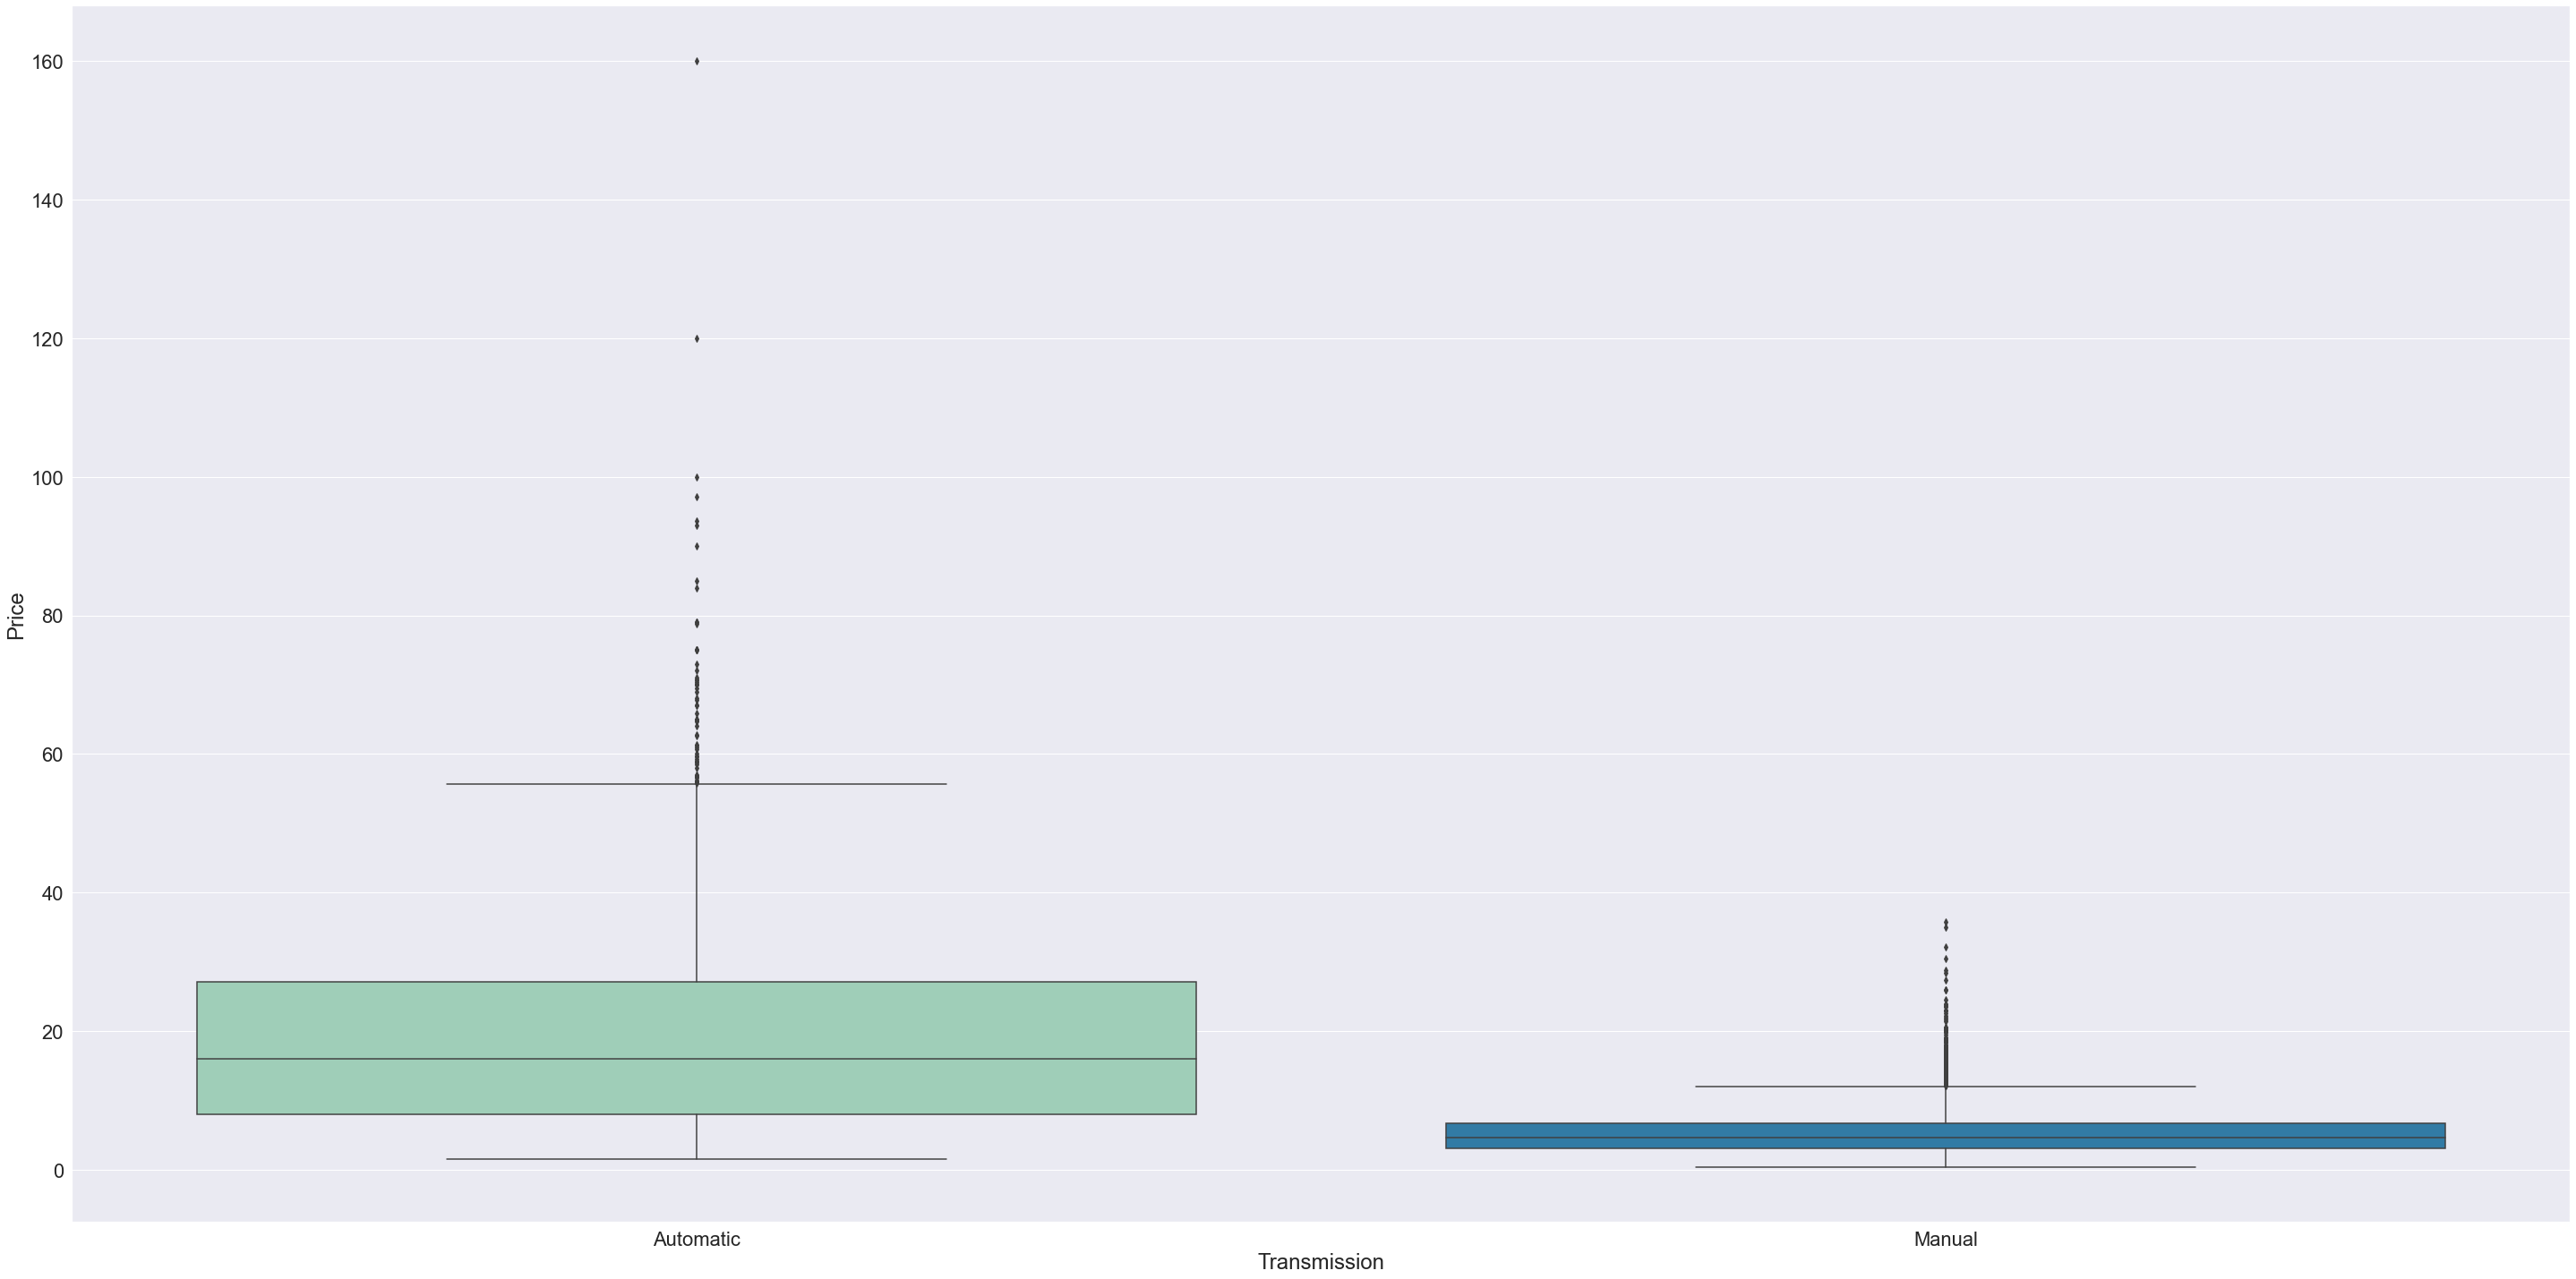

In [306]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Transmission"],cars["Price"],palette="YlGnBu")
plt.show()

Observation:
* Automatic cars have higher price than manual ones

### Price vs Owner_Type

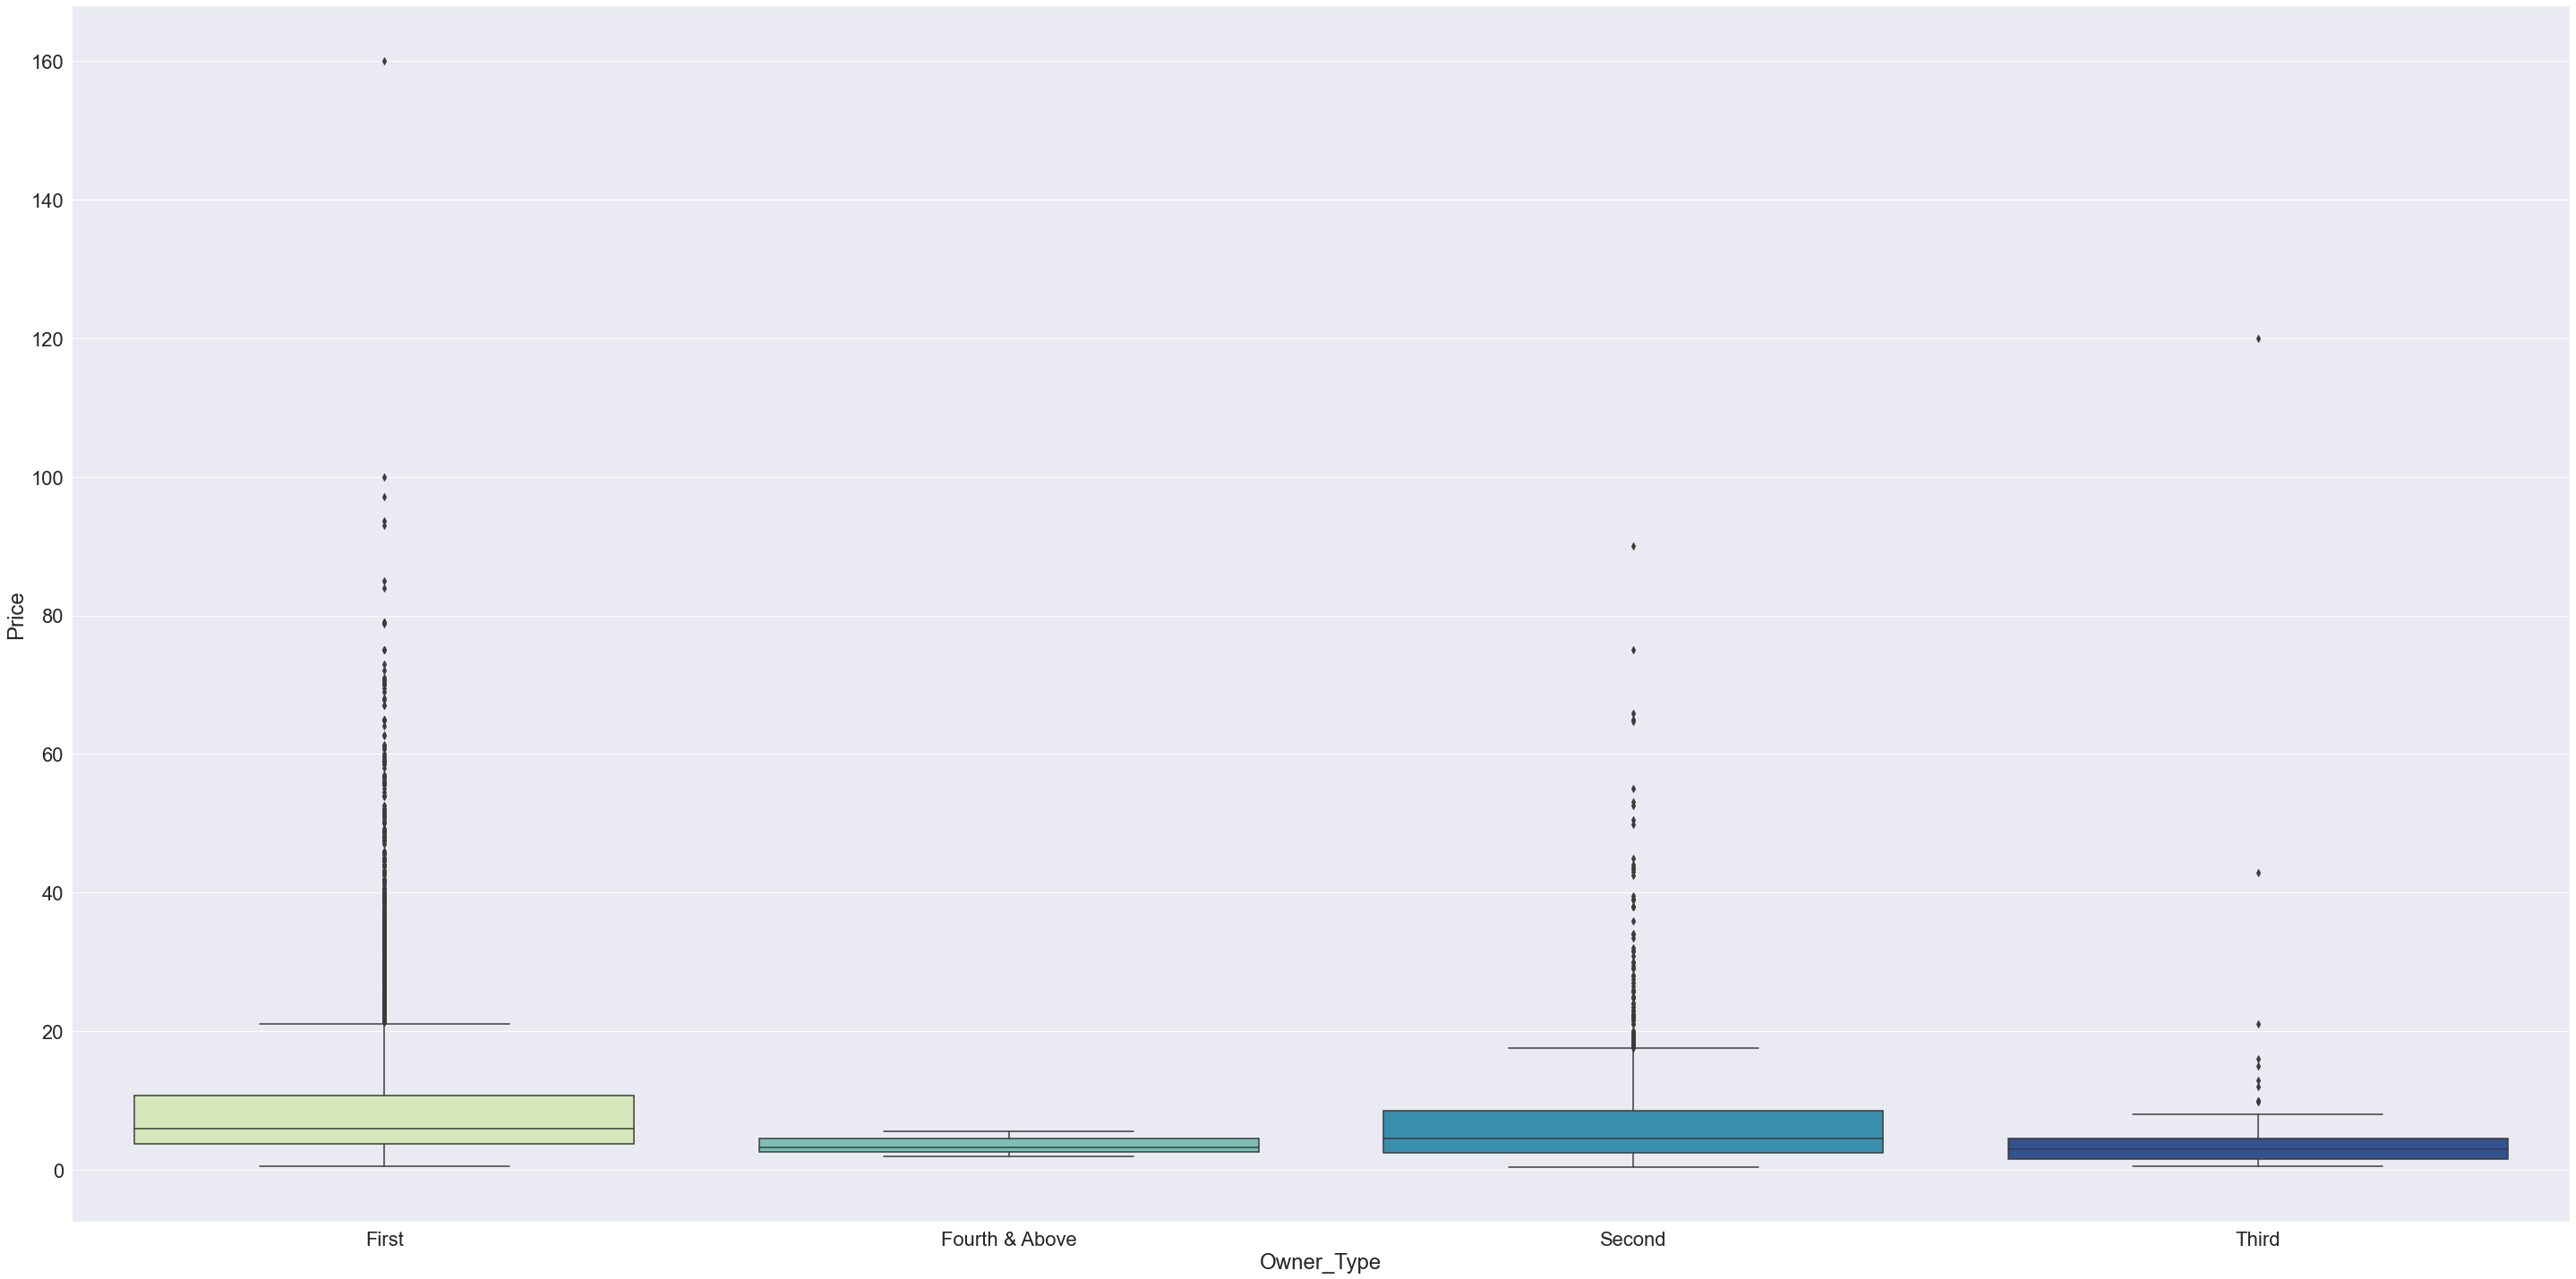

In [307]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Owner_Type"],cars["Price"],palette="YlGnBu")
plt.show()

Observation:
* First hand cars are higher priced than Second and below

### Price vs Seats

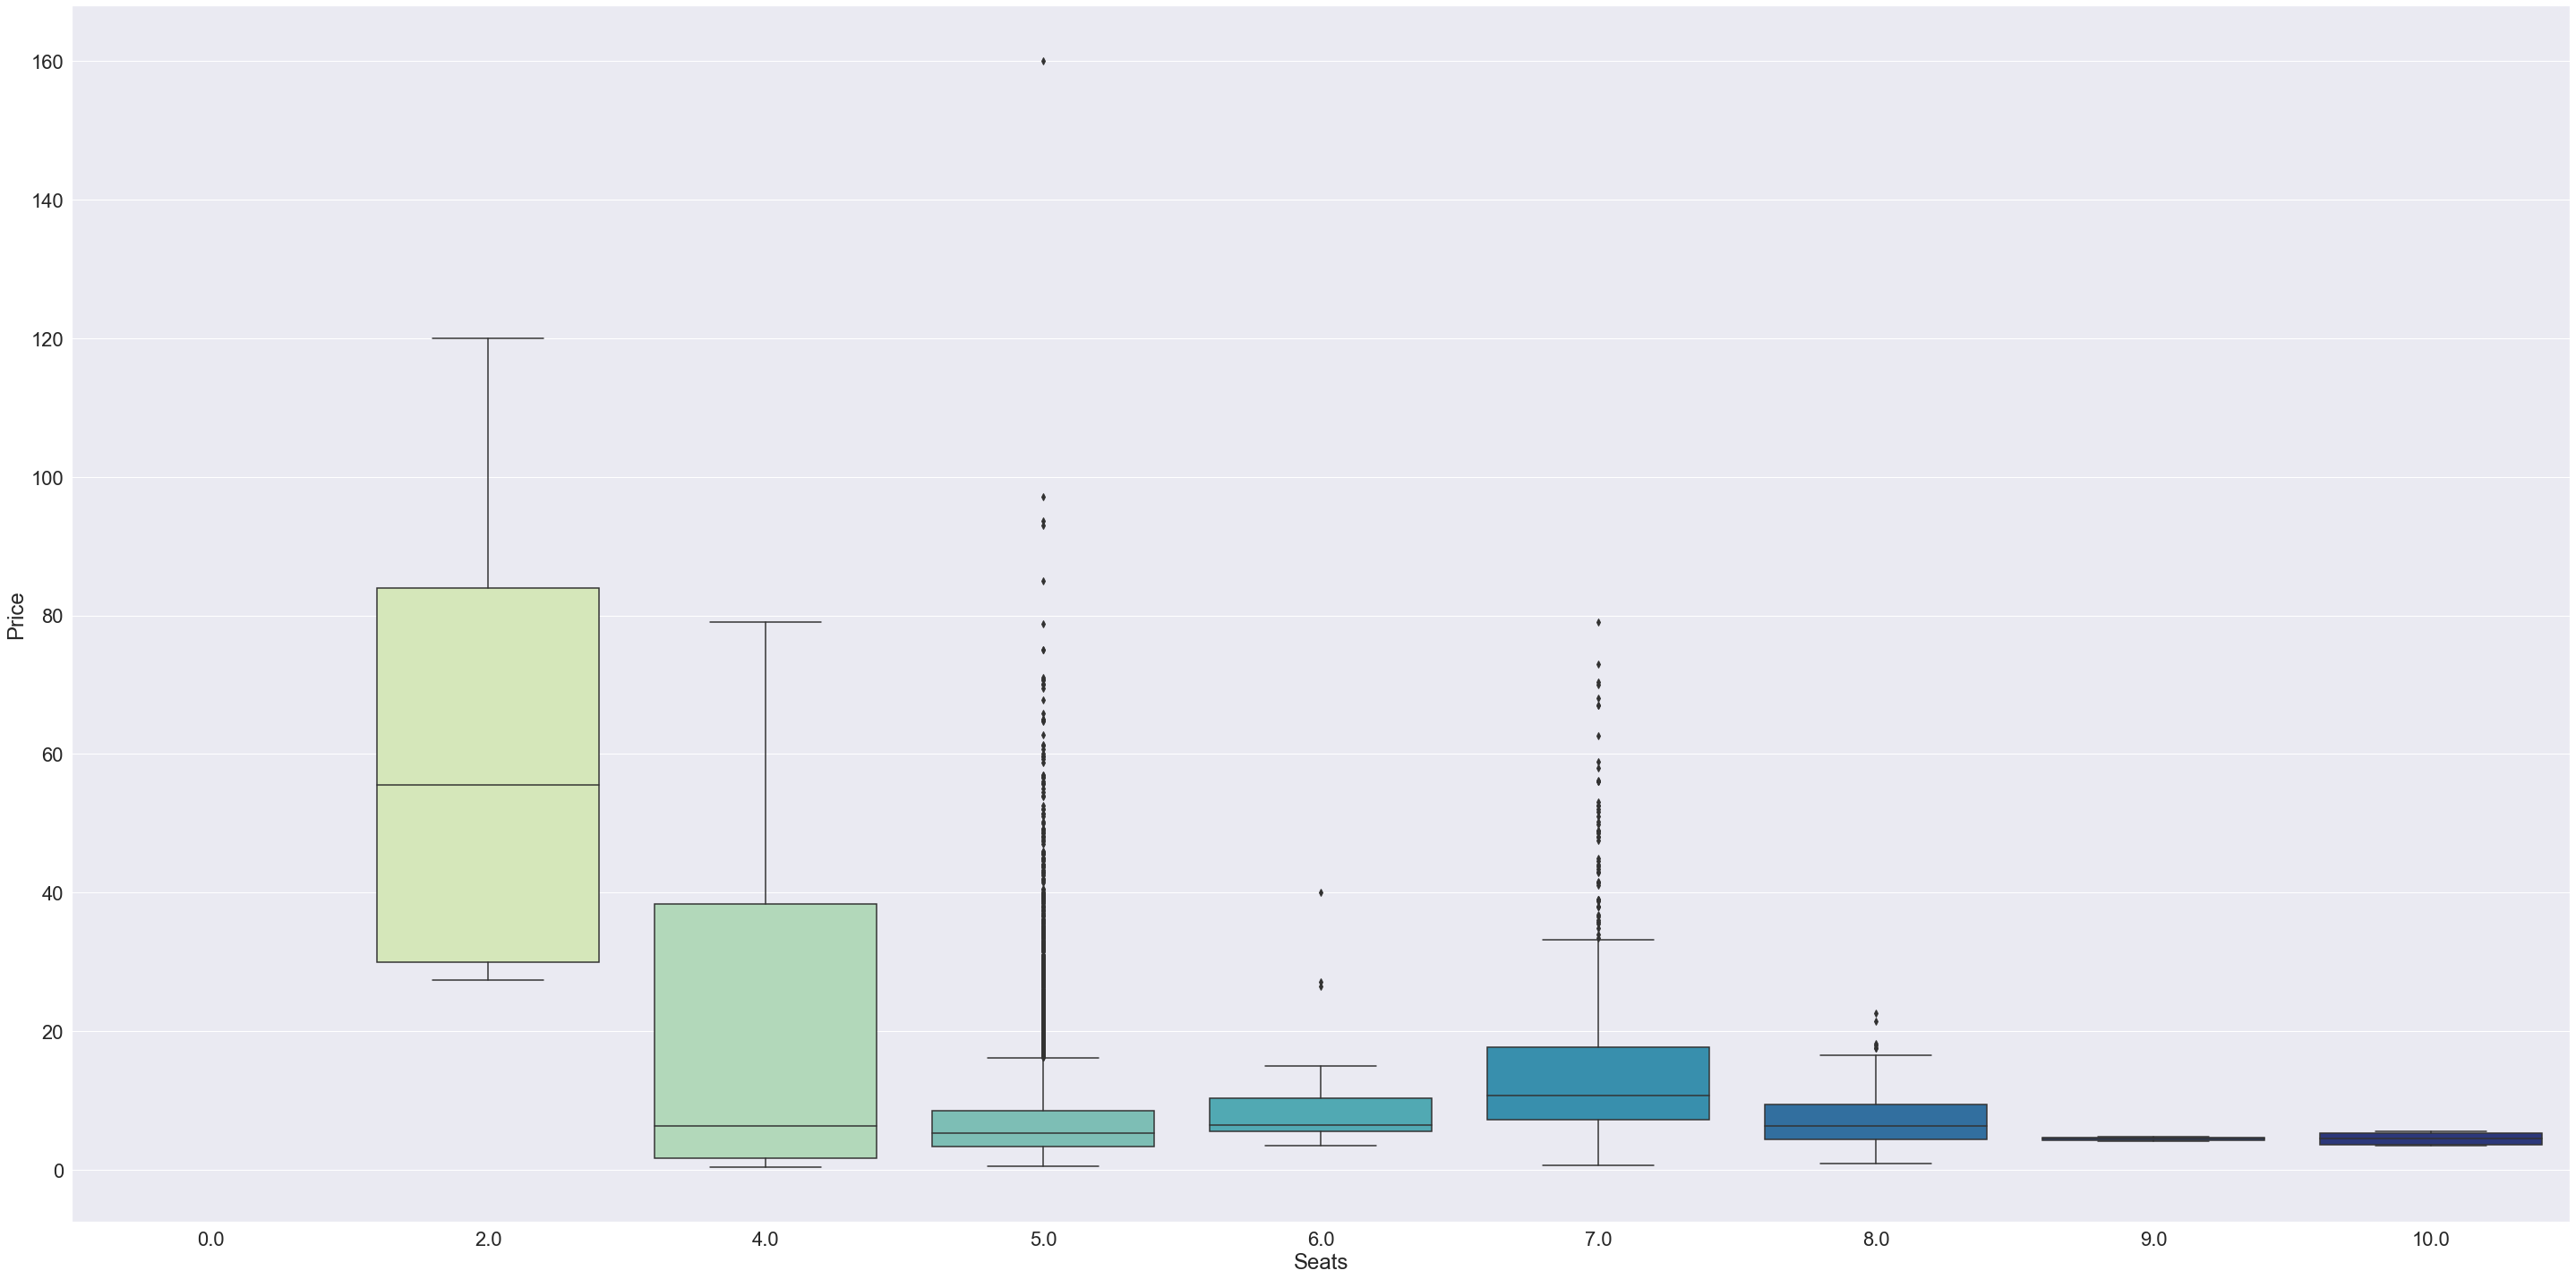

In [308]:
plt.figure(figsize=(50,25))
sns.boxplot(cars["Seats"],cars["Price"],palette="YlGnBu")
plt.show()

Observation:
* Cars with 2 seats are higher priced
* Cars with 5 seats are varyingly priced and those with 9 and 10 seats are priced lower


### Price vs Mileage

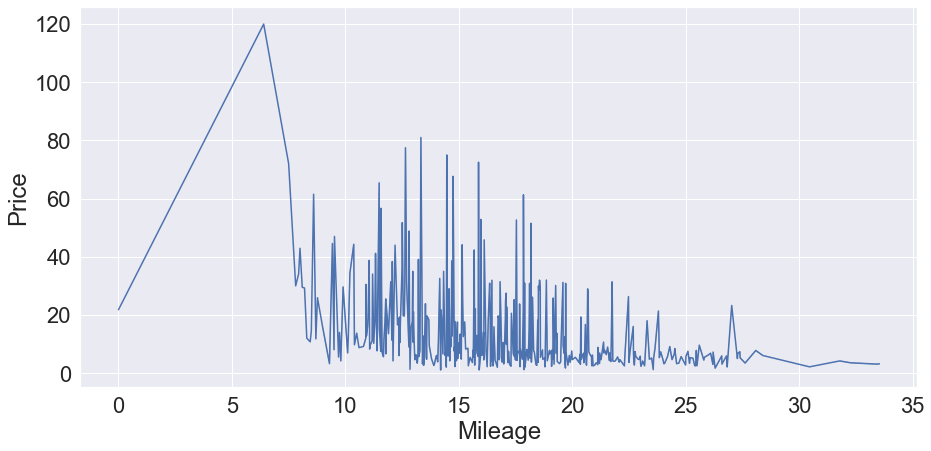

In [309]:
plt.figure(figsize=(15,7))
sns.lineplot(cars["Mileage"],cars["Price"],ci=0)
plt.show()

Observation:
* Cars with lower Mileage have higher prices than ones with higher Mileage

### Price vs Engine

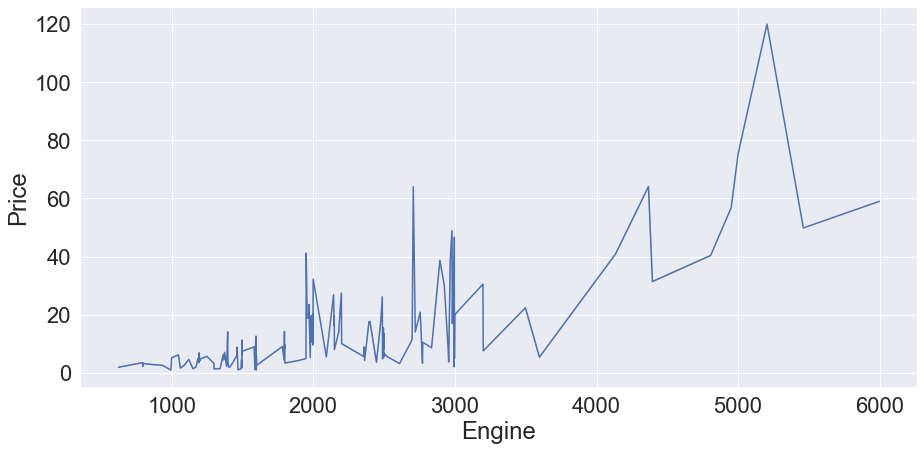

In [310]:
plt.figure(figsize=(15,7))
sns.lineplot(cars["Engine"],cars["Price"],ci=0)
plt.show()

Observation:
* Engines with higher cc have higher price

### Price vs Power

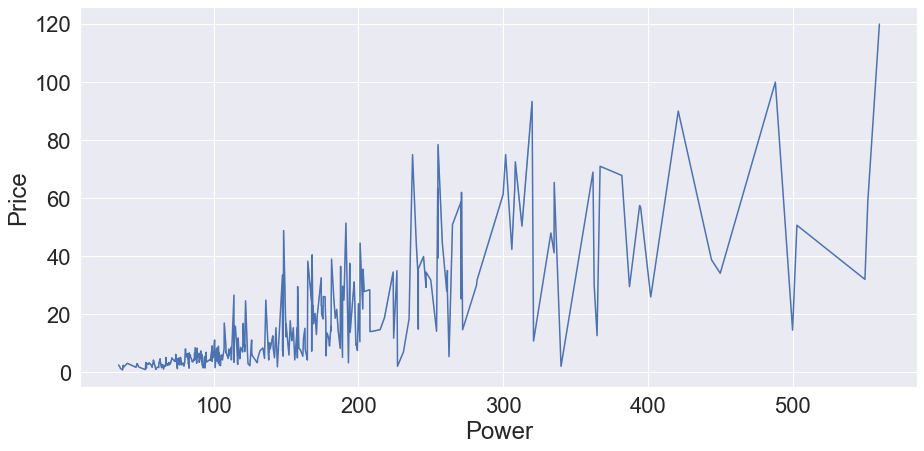

In [311]:
plt.figure(figsize=(15,7))
sns.lineplot(cars["Power"],cars["Price"],ci=0)
plt.show()

Observation:
* Cars with higher power are priced higher

### Price vs Kilometers_Driven

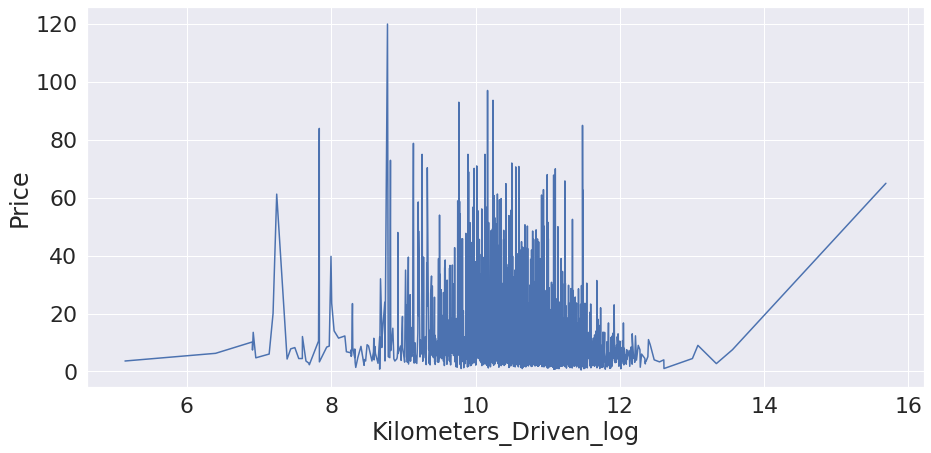

In [41]:
plt.figure(figsize=(15,7))
sns.lineplot(cars["Kilometers_Driven_log"],cars["Price"],ci=0)
plt.show()

Observation:
* Price decreases with more kilometers driven for the car

## Multivariate Analysis

Let us analyse the different variables together to understand which all factors lead to higher prices for the cars

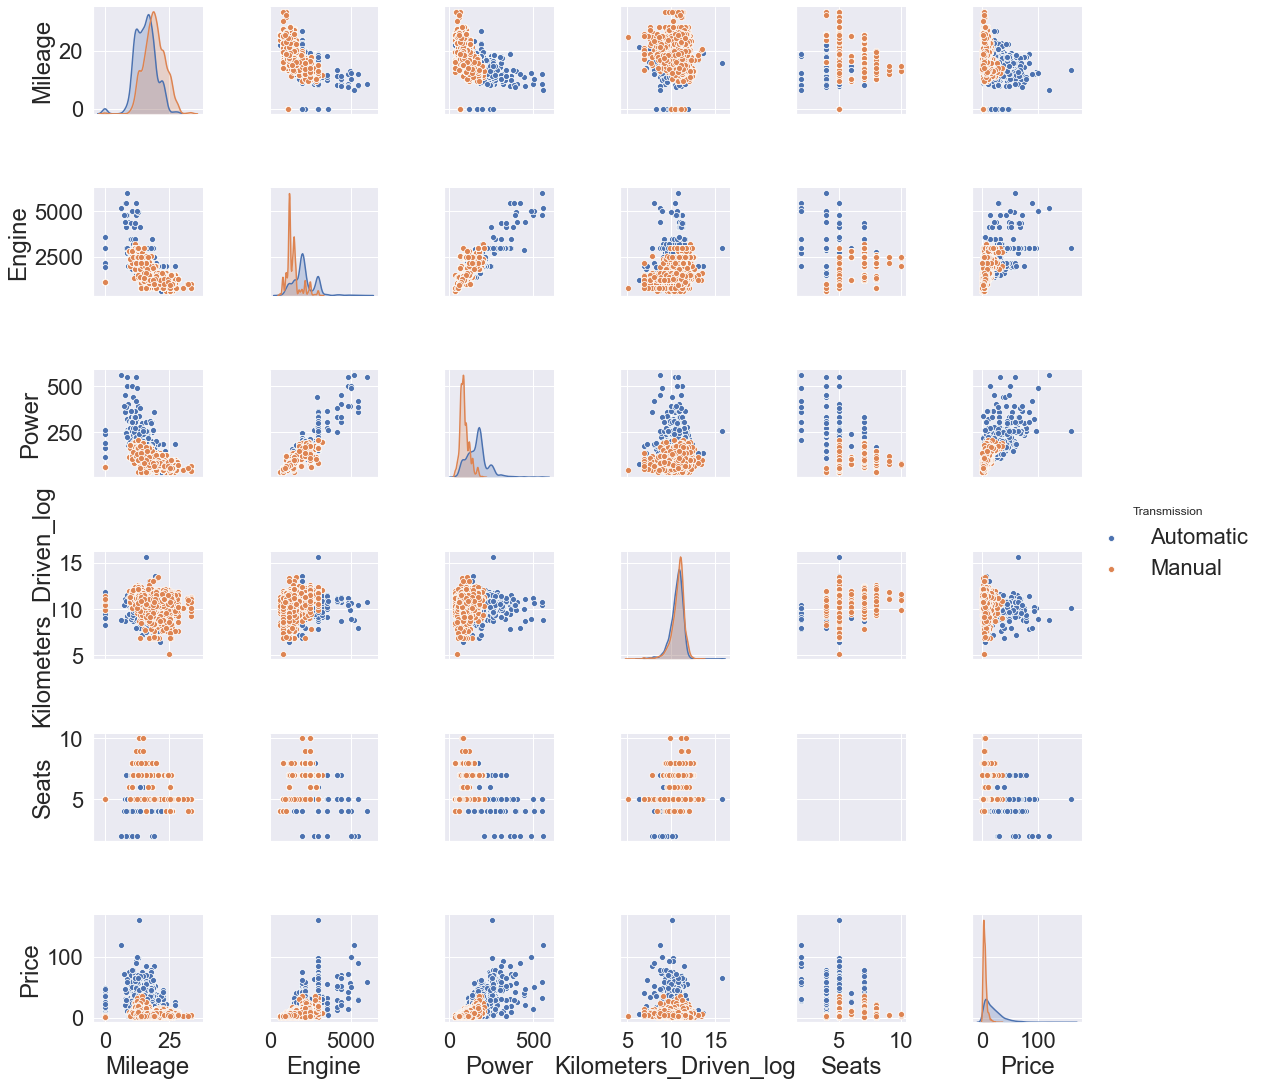

In [313]:
sns.pairplot(cars[['Transmission','Mileage','Engine','Fuel_Type','Owner_Type','Power','Kilometers_Driven_log','Seats','Price']],hue='Transmission')#Only selecting the required variables to plot
plt.show()


### Mileage vs Engine vs Transmission

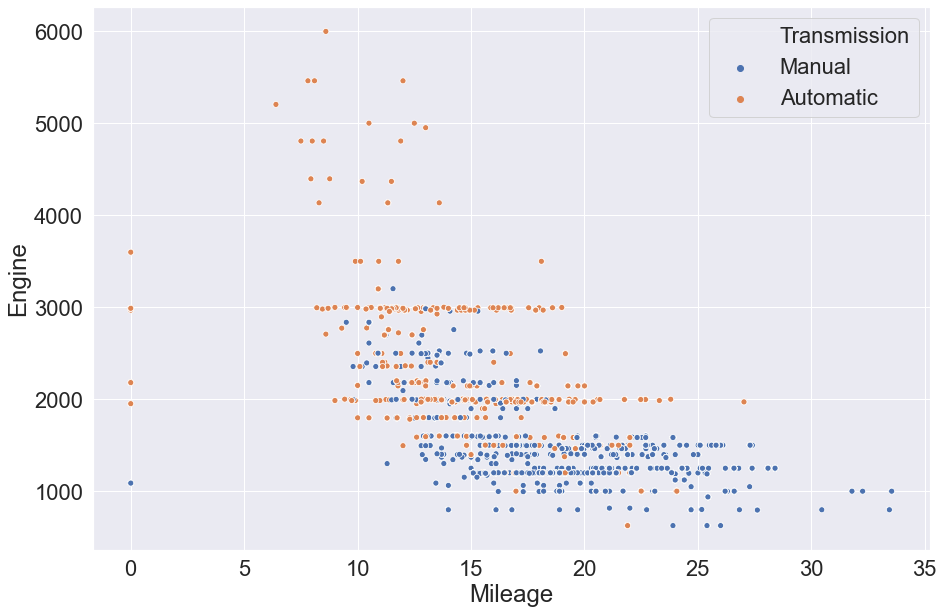

In [314]:
plt.figure(figsize=(15,10))
sns.scatterplot(cars["Mileage"],cars["Engine"],hue=cars["Transmission"])

* Manual cars have higher Mileage 

### Kilometers_Driven_Log vs Mileage vs Transmission

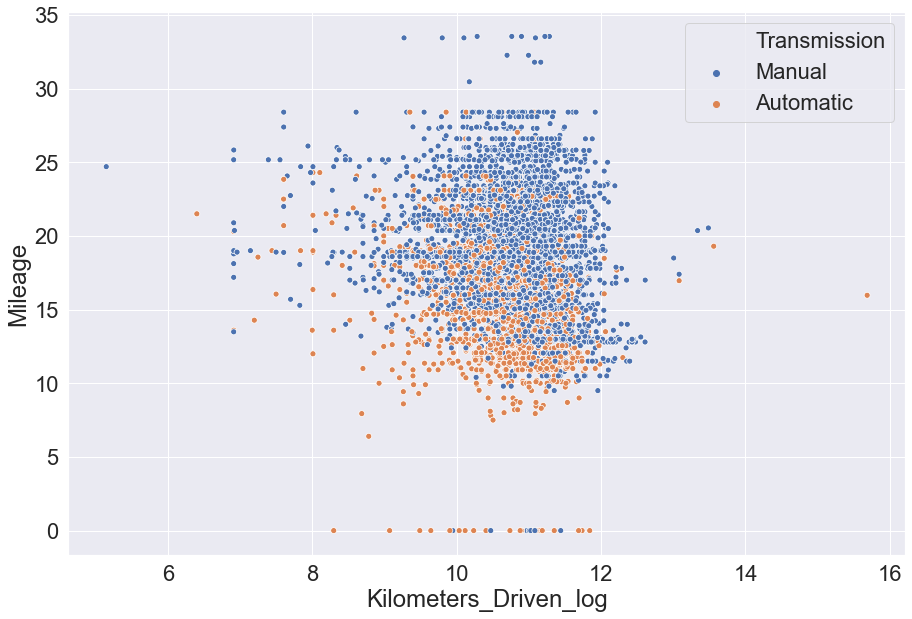

In [315]:
plt.figure(figsize=(15,10))
sns.scatterplot(cars["Kilometers_Driven_log"],cars["Mileage"],hue=cars["Transmission"])

* Manual_Cars have higher Mileage

### Mileage vs Price vs Transmission

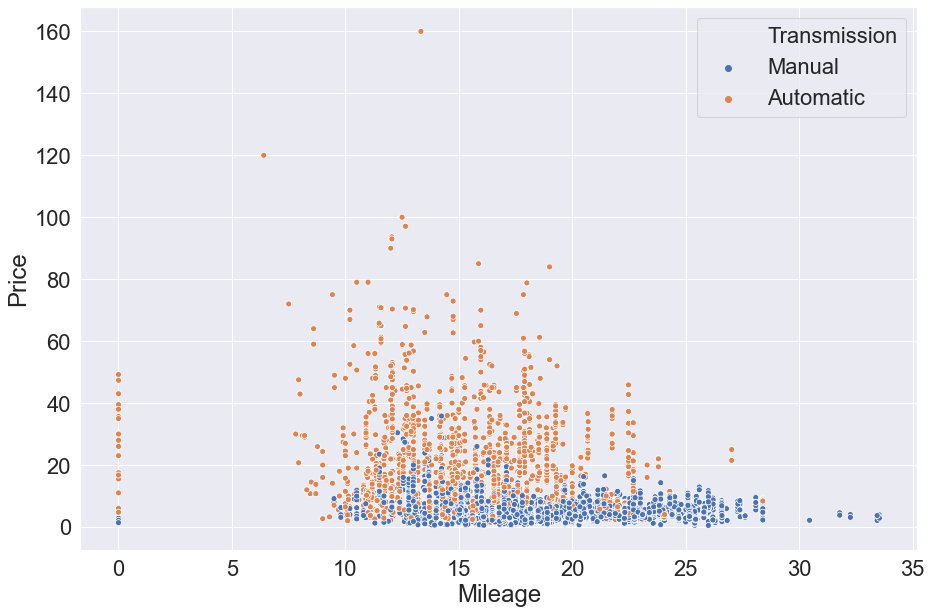

In [316]:
plt.figure(figsize=(15,10))
sns.scatterplot(cars["Mileage"],cars["Price"],hue=cars["Transmission"])

* Manual cars are lesser priced and has more mileage

### Engine vs Price vs Transmission

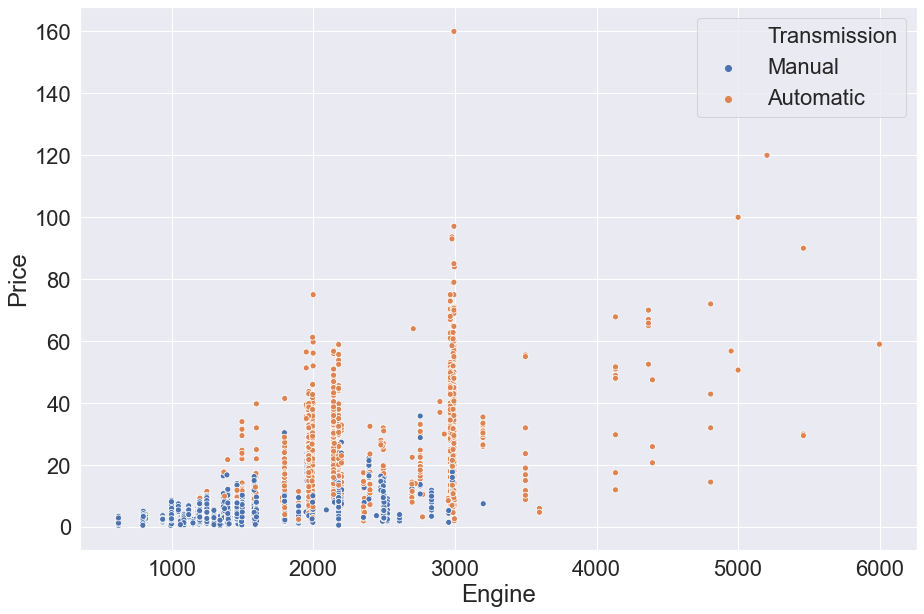

In [317]:
plt.figure(figsize=(15,10))
sns.scatterplot(cars["Engine"],cars["Price"],hue=cars["Transmission"])

* Automatic cars have higher Engine CC

### Kilometers Driven vs Price vs Transmission

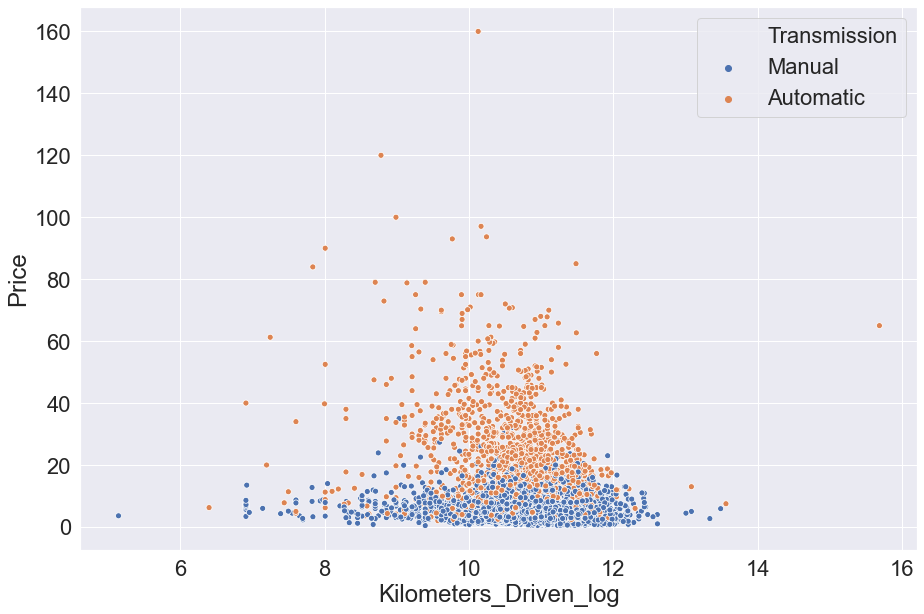

In [318]:
plt.figure(figsize=(15,10))
sns.scatterplot(cars['Kilometers_Driven_log'],cars["Price"],hue=cars["Transmission"])

* Cannot see much difference in kilometers driven between Manual and Automatic cars

### Power vs Price vs Transmission

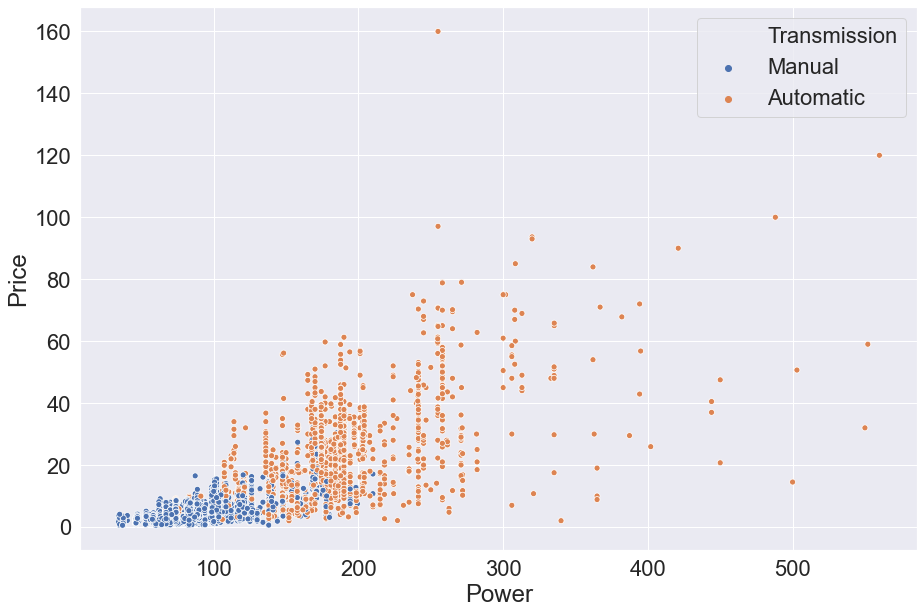

In [319]:
plt.figure(figsize=(15,10))
sns.scatterplot(cars['Power'],cars["Price"],hue=cars["Transmission"])

* Automatic cars have higher power

### Insights Based on EDA

* Some of the factors that increases the price of the cars are higher Power and Engine .Also prices tend to be higher for automatic cars
* Cars are being sold for higher prices in cities Coimbatore,Bangalore etc and for lesser price in cities like Jaipur,Kolkata etc
* Diesel cars have higher price among all other fuel types
* First hand cars tend to be sold for more price than second and third owned
* Some of the factors that decrease the price of the car are higher Mileage and higher kilometers driven
* Among the cars being sold 20% are from companies like Maruti followed by Hyundai
* Two seater cars are priced higher
* Automatic cars are sold for higher price than manual ones
* We can see that Land Rovers,Porsche,Audi have the highest Price among the cars

### Outlier Determination

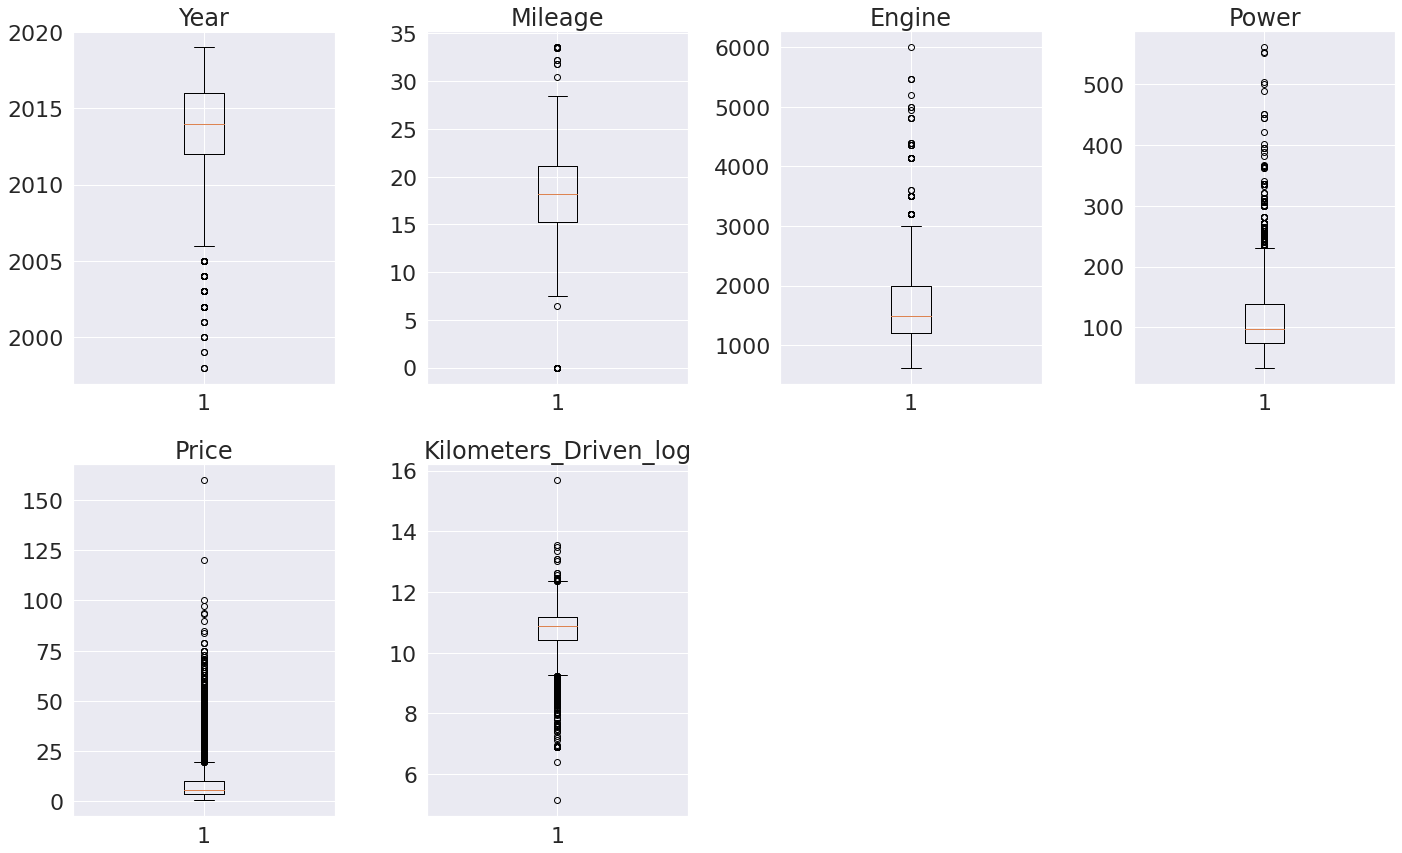

In [42]:
# outlier detection using boxplot
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))


for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(cars[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* We can see Mileage with 0 value which needs further investigation.
* Other variables like Engine,Power, Price has upper outliers.It will be ideal to remove the price outlier value

### Treating the outliers

Will delete the data with 0 Mileage and Price 160 lakhs

In [43]:
# Determining the index of row which has 0 Mileage and Price of 160 lakhs
Outlier_values = cars[ (cars['Price'] == 160) | (cars['Mileage'] == 0)].index
Outlier_values


Int64Index([  14,   67,  526,  685,  932,  966, 1029, 1226, 1273, 1316, 1718,
            2605, 2963, 3011, 3126, 3186, 3972, 4124, 4192, 4300, 4571, 4587,
            4888, 4894, 5178, 5241, 5732, 5826, 5864],
           dtype='int64')

In [44]:
# drop these row indexes from dataFrame 
cars.drop(Outlier_values, inplace = True) 

## Model Building-Linear Regression

In [91]:
cars.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_log,Car_Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11.184421,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,10.621327,Hyundai
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10.736397,Honda
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11.373663,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10.613246,Audi


In [92]:
#Defining X and y variables
X = cars.drop(['Price','Name'], axis=1)
y = cars[['Price']]

print(X.head())
print(y.head())

     Location  Year Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0      Mumbai  2010       CNG       Manual      First    26.60   998.0   
1        Pune  2015    Diesel       Manual      First    19.67  1582.0   
2     Chennai  2011    Petrol       Manual      First    18.20  1199.0   
3     Chennai  2012    Diesel       Manual      First    20.77  1248.0   
4  Coimbatore  2013    Diesel    Automatic     Second    15.20  1968.0   

    Power Seats  Kilometers_Driven_log Car_Brand  
0   58.16   5.0              11.184421    Maruti  
1  126.20   5.0              10.621327   Hyundai  
2   88.70   5.0              10.736397     Honda  
3   88.76   7.0              11.373663    Maruti  
4  140.80   5.0              10.613246      Audi  
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


In [93]:
print(X.shape)
print(y.shape)

(5843, 11)
(5843, 1)


### Create Dummy Variables

In [94]:
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type','Transmission','Owner_Type','Seats','Car_Brand'], drop_first=True)
X.head()
X.shape

(5843, 60)

In [59]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
y.shape

(5843, 1)

In [95]:
X_train.head()

,Year,Mileage,Engine,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Car_Brand_Mini,Car_Brand_Mitsubishi,Car_Brand_Nissan,Car_Brand_Porsche,Car_Brand_Renault,Car_Brand_Skoda,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
4434,2013,25.8,1498.0,98.60,11.050890,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2175,2018,18.0,1497.0,117.30,9.918376,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2328,2016,13.7,1798.0,157.75,10.945071,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1156,2014,16.8,1497.0,116.30,10.308953,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5059,2009,15.5,1586.0,103.30,11.429544,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Choose Model,Train and Evaluate 

In [96]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)             

Intercept of the linear equation: [-1725.48165063]

COefficients of the equation are: [[ 8.66968323e-01 -1.06354454e-01  7.64660415e-04  8.29711871e-02
  -1.35374139e+00  2.08198181e+00  1.23376974e+00  1.91410886e+00
  -5.59096310e-01  1.23166525e+00  8.71515274e-01 -2.03860423e-01
  -1.53914581e+00 -6.93446015e-01  4.47572994e-01  6.41954817e-01
   4.44089210e-15  1.52887018e+00 -8.68274868e-01  7.48276958e-02
   6.83353923e-01 -7.29159761e-01  2.60178629e-01  1.13781754e+01
  -9.14328169e-01 -3.24576517e+00 -2.08693245e+00 -1.23007036e+00
  -1.82504200e+00 -1.01555732e+00 -1.06047988e+00  5.28711505e+00
   5.30074575e+00  1.10141720e+01 -4.40893147e+00 -7.10697577e+00
  -3.83033262e+00 -7.05972097e+00 -3.37933469e+00 -4.47697881e+00
  -3.94607082e+00 -8.58406656e+00 -4.64459288e+00  9.96894870e+00
  -2.69672216e+00  8.88178420e-16  1.90537227e+01 -7.12225710e+00
  -2.97532773e+00  6.70205531e+00  8.22032899e+00 -3.07018715e+00
  -3.76556932e+00  2.14286788e+01 -4.68711240e+00 -3.774

### Model Performance

In [330]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

2.859158693523042

The mean absolute error (MAE) is the simplest regression error metric.It is calculated by taking the absolute value of the residual for every data point, so that negative and positive residuals do not cancel out. The average of all these residuals are then taken to obtain the MAE.

In [331]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

5.135125601059347

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [332]:
# R Squared: on test
r2_score(y_test, pred)

0.796377902748143

In [333]:
# Training Score
linearregression.score(X_train, y_train)

0.7949499732166628

* R^2 (coefficient of determination) is the regression score function.
* Here we have obtained R^2 value as 0.79 which means that in this model independent variables are able to explain 79% of variances in dependent variable.We need to see if we can improve the Model performance

### Conclusion:
* The Training and testing scores are around 79% and both scores are comparable, hence the model is a good fit.

* R2_score is 0.79, that explains 79% of total variation in the dataset. 

## Further Analysis using statsmodels

Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [334]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     279.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:45   Log-Likelihood:                -12314.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4033   BIC:                         2.510e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) then any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Price of cars deceases with their increase.
- Positive values of coefficient shows that, Price inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 

### Checking the Linear Regression Assumptions
We will check the below 5 assumptions of Linear Regression

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

#### 1. Test for Multicollinearity using VIF scores

 If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [335]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [336]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                          0.000000
Year                           2.210858
Mileage                        4.055250
Engine                        12.134158
Power                         10.775536
Kilometers_Driven_log          1.789265
Location_Bangalore             2.470214
Location_Chennai               2.983374
Location_Coimbatore            3.574329
Location_Delhi                 3.195857
Location_Hyderabad             3.795859
Location_Jaipur                2.688855
Location_Kochi                 3.630244
Location_Kolkata               3.148491
Location_Mumbai                4.047748
Location_Pune                  3.387616
Fuel_Type_Diesel              28.711879
Fuel_Type_Electric                  NaN
Fuel_Type_LPG                  1.205504
Fuel_Type_Petrol              29.982083
Transmission_Manual            2.271461
Owner_Type_Fourth & Above      1.012988
Owner_Type_Second              1.170685
Owner_Type_Third               1.130440
Seats

### Removing Multicollinearity

* To remove multicollinearity we will be following the below steps
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [1]:
# we drop the one with the highest vif values obtained from above and check the Adjusted-R Squared
X_train2 = X_train1.drop('Car_Brand_Maruti', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

NameError: name 'X_train1' is not defined

In [338]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     279.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:47   Log-Likelihood:                -12314.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4033   BIC:                         2.510e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [339]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train3 = X_train2.drop('Seats_5.0', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                        899427.593011
Year                              2.213497
Mileage                           4.168737
Engine                           11.839819
Power                            10.859681
Kilometers_Driven_log             1.762023
Location_Bangalore                2.566031
Location_Chennai                  3.257725
Location_Coimbatore               3.792405
Location_Delhi                    3.339701
Location_Hyderabad                4.061627
Location_Jaipur                   2.817616
Location_Kochi                    3.869043
Location_Kolkata                  3.340279
Location_Mumbai                   4.364398
Location_Pune                     3.621345
Fuel_Type_Diesel                 30.977112
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.191889
Fuel_Type_Petrol                 32.628780
Transmission_Manual               2.280181
Owner_Type_Fourth & Above         1.014693
Owner_Type_Second  

In [340]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     279.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:48   Log-Likelihood:                -12314.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4033   BIC:                         2.510e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [341]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train4 = X_train3.drop('Fuel_Type_Petrol', axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

const                        899195.812760
Year                              2.213496
Mileage                           3.887019
Engine                           11.613409
Power                            10.821469
Kilometers_Driven_log             1.749988
Location_Bangalore                2.565806
Location_Chennai                  3.257015
Location_Coimbatore               3.790729
Location_Delhi                    3.339565
Location_Hyderabad                4.060286
Location_Jaipur                   2.814997
Location_Kochi                    3.868887
Location_Kolkata                  3.338978
Location_Mumbai                   4.362781
Location_Pune                     3.620818
Fuel_Type_Diesel                  2.760667
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.012002
Transmission_Manual               2.280180
Owner_Type_Fourth & Above         1.014681
Owner_Type_Second                 1.165864
Owner_Type_Third   

In [342]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     284.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:49   Log-Likelihood:                -12315.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4034   BIC:                         2.510e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [343]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train5 = X_train4.drop('Engine', axis=1)
vif_series5 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series5))

Series before feature selection: 

const                        889998.278548
Year                              2.193025
Mileage                           3.559396
Power                             4.777751
Kilometers_Driven_log             1.749924
Location_Bangalore                2.565590
Location_Chennai                  3.255246
Location_Coimbatore               3.789705
Location_Delhi                    3.339393
Location_Hyderabad                4.059728
Location_Jaipur                   2.813331
Location_Kochi                    3.868258
Location_Kolkata                  3.338504
Location_Mumbai                   4.362770
Location_Pune                     3.620361
Fuel_Type_Diesel                  2.350412
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.011954
Transmission_Manual               2.280093
Owner_Type_Fourth & Above         1.014677
Owner_Type_Second                 1.165648
Owner_Type_Third                  1.125895
Seats_2.0          

In [344]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     289.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:50   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4035   BIC:                         2.509e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [345]:
# we drop the one with the NaN vif values and check the Adjusted-R Squared
X_train6 = X_train5.drop('Car_Brand_Lamborghini', axis=1)
vif_series6 = pd.Series([variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])],index=X_train6.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series6))

Series before feature selection: 

const                        889998.278548
Year                              2.193025
Mileage                           3.559396
Power                             4.777751
Kilometers_Driven_log             1.749924
Location_Bangalore                2.565590
Location_Chennai                  3.255246
Location_Coimbatore               3.789705
Location_Delhi                    3.339393
Location_Hyderabad                4.059728
Location_Jaipur                   2.813331
Location_Kochi                    3.868258
Location_Kolkata                  3.338504
Location_Mumbai                   4.362770
Location_Pune                     3.620361
Fuel_Type_Diesel                  2.350412
Fuel_Type_Electric                     NaN
Fuel_Type_LPG                     1.011954
Transmission_Manual               2.280093
Owner_Type_Fourth & Above         1.014677
Owner_Type_Second                 1.165648
Owner_Type_Third                  1.125895
Seats_2.0          

In [346]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     289.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:50   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4035   BIC:                         2.509e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [347]:
# we drop the one with the NaN vif values and check the Adjusted-R Squared
X_train7 = X_train6.drop('Fuel_Type_Electric', axis=1)
vif_series7 = pd.Series([variance_inflation_factor(X_train7.values,i) for i in range(X_train7.shape[1])],index=X_train7.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series7))

Series before feature selection: 

const                        889998.278548
Year                              2.193025
Mileage                           3.559396
Power                             4.777751
Kilometers_Driven_log             1.749924
Location_Bangalore                2.565590
Location_Chennai                  3.255246
Location_Coimbatore               3.789705
Location_Delhi                    3.339393
Location_Hyderabad                4.059728
Location_Jaipur                   2.813331
Location_Kochi                    3.868258
Location_Kolkata                  3.338504
Location_Mumbai                   4.362770
Location_Pune                     3.620361
Fuel_Type_Diesel                  2.350412
Fuel_Type_LPG                     1.011954
Transmission_Manual               2.280093
Owner_Type_Fourth & Above         1.014677
Owner_Type_Second                 1.165648
Owner_Type_Third                  1.125895
Seats_2.0                         1.096808
Seats_4.0          

In [348]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     289.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4035   BIC:                         2.509e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Earlier R-Squared was 79.5 and after removing variables with high vif it still remains to be 79.5 which is good, so we will proceed with OLSmod6

* Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance

**Sometimes p values change after dropping a variable, so ideally we need to drop them one by one.**

### We see that 'Car_Brand_Jeep' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [349]:

X_train8 = X_train7.drop(['Car_Brand_Jeep'], axis=1)

In [350]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     294.8
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4036   BIC:                         2.508e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now see that 'Car_Brand_Mitsubishi' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [351]:
X_train9 = X_train8.drop(['Car_Brand_Mitsubishi'], axis=1)

In [352]:
olsmod8 = sm.OLS(y_train, X_train9)
olsres8 = olsmod8.fit()
print(olsres8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     300.6
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4037   BIC:                         2.507e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now see that 'Car_Brand_Isuzu' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [353]:
X_train10 = X_train9.drop(['Car_Brand_Isuzu'], axis=1)

In [354]:
olsmod9 = sm.OLS(y_train, X_train10)
olsres9 = olsmod9.fit()
print(olsres9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     306.5
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4038   BIC:                         2.507e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now see that 'Transmission_Manual' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [355]:
X_train11 = X_train10.drop(['Transmission_Manual'], axis=1)

In [356]:
olsmod10 = sm.OLS(y_train, X_train11)
olsres10 = olsmod10.fit()
print(olsres10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     312.7
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.474e+04
Df Residuals:                    4039   BIC:                         2.506e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Now see that 'Owner_Type_Fourth & Above' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [357]:
X_train12 = X_train11.drop(['Owner_Type_Fourth & Above'], axis=1)

In [358]:
olsmod11 = sm.OLS(y_train, X_train12)
olsres11 = olsmod11.fit()
print(olsres11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     319.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.473e+04
Df Residuals:                    4040   BIC:                         2.505e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Location_Kochi' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [359]:
X_train13 = X_train12.drop(['Location_Kochi'], axis=1)

In [360]:
olsmod12 = sm.OLS(y_train, X_train13)
olsres12 = olsmod12.fit()
print(olsres12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     325.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.473e+04
Df Residuals:                    4041   BIC:                         2.504e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Owner_Type_Third' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [361]:
X_train14 = X_train13.drop(['Owner_Type_Third'], axis=1)

In [362]:
olsmod13 = sm.OLS(y_train, X_train14)
olsres13 = olsmod13.fit()
print(olsres13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     332.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.473e+04
Df Residuals:                    4042   BIC:                         2.503e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Car_Brand_Fiat' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [363]:
X_train15 = X_train14.drop(['Car_Brand_Fiat'], axis=1)

In [364]:
olsmod14 = sm.OLS(y_train, X_train15)
olsres14 = olsmod14.fit()
print(olsres14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     340.2
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12317.
No. Observations:                4090   AIC:                         2.473e+04
Df Residuals:                    4043   BIC:                         2.503e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Car_Brand_Ford','Seats_9.0' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [365]:
X_train16 = X_train15.drop(['Car_Brand_Ford','Seats_9.0'], axis=1)

In [366]:
olsmod15 = sm.OLS(y_train, X_train16)
olsres15 = olsmod15.fit()
print(olsres15.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     355.7
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12318.
No. Observations:                4090   AIC:                         2.473e+04
Df Residuals:                    4045   BIC:                         2.501e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Car_Brand_Nissan' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [367]:
X_train17 = X_train16.drop(['Car_Brand_Nissan'], axis=1)

In [368]:
olsmod16 = sm.OLS(y_train, X_train17)
olsres16 = olsmod16.fit()
print(olsres16.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     363.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12318.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4046   BIC:                         2.500e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Seats_10.0' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [369]:
X_train18 = X_train17.drop(['Seats_10.0'], axis=1)

In [370]:
olsmod17 = sm.OLS(y_train, X_train18)
olsres17 = olsmod17.fit()
print(olsres17.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     372.5
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:                -12319.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4047   BIC:                         2.500e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Fuel_Type_LPG' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [371]:
X_train19 = X_train18.drop(['Fuel_Type_LPG'], axis=1)

In [372]:
olsmod18 = sm.OLS(y_train, X_train19)
olsres18 = olsmod18.fit()
print(olsres18.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     381.5
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:52   Log-Likelihood:                -12320.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4048   BIC:                         2.499e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Location_Delhi' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [373]:
X_train20 = X_train19.drop(['Location_Delhi'], axis=1)

In [374]:
olsmod19 = sm.OLS(y_train, X_train20)
olsres19 = olsmod19.fit()
print(olsres19.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     391.0
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:52   Log-Likelihood:                -12320.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4049   BIC:                         2.498e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Car_Brand_Skoda' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [375]:
X_train21 = X_train20.drop(['Car_Brand_Skoda'], axis=1)

In [376]:
olsmod20 = sm.OLS(y_train, X_train21)
olsres20 = olsmod20.fit()
print(olsres20.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     400.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:52   Log-Likelihood:                -12321.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4050   BIC:                         2.498e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Car_Brand_Force','Car_Brand_ISUZU' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [377]:
X_train22 = X_train21.drop(['Car_Brand_Force','Car_Brand_ISUZU'], axis=1)

In [378]:
olsmod21 = sm.OLS(y_train, X_train22)
olsres21 = olsmod21.fit()
print(olsres21.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     422.3
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:52   Log-Likelihood:                -12323.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4052   BIC:                         2.496e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Location_Mumbai' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [379]:
X_train23 = X_train22.drop(['Location_Mumbai'], axis=1)

In [380]:
olsmod22 = sm.OLS(y_train, X_train23)
olsres22 = olsmod22.fit()
print(olsres22.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     433.9
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:52   Log-Likelihood:                -12324.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4053   BIC:                         2.496e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

### Now see that 'Seats_6.0' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [381]:
X_train24 = X_train23.drop(['Seats_6.0'], axis=1)

In [382]:
olsmod23 = sm.OLS(y_train, X_train24)
olsres23 = olsmod23.fit()
print(olsres23.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     446.0
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:52   Log-Likelihood:                -12325.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4054   BIC:                         2.495e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

***Now no feature has p value greater than 0.05, so we'll consider features in X_train24 as the final ones and olsres23 as final model***

### Observations
* Now Adjusted R-squared is 0.792, Our model is able to explain 79.2% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 it was 79.2% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model at all.
     

### Now we'll check rest of the assumptions on model - olsres23
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### Checking Mean of Residuals

In [383]:
residual= olsres23.resid
np.mean(residual)

-2.853766123167513e-13

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.


In [384]:
residual=olsres23.resid
fitted=olsres23.fittedvalues #predicted values

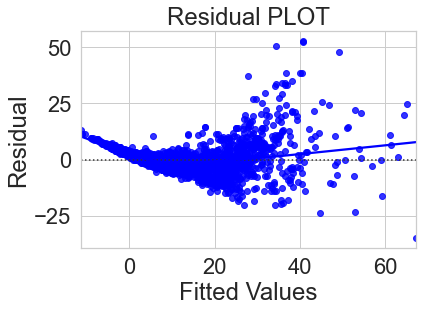

In [385]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="blue",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

### TEST FOR NORMALITY

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. 
Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on 
minimization of least squares.

* We can check Normality via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

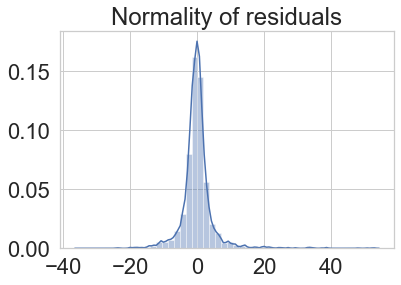

In [386]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line

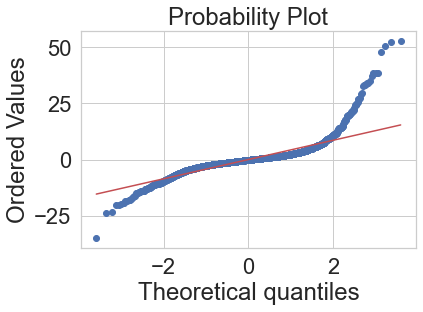

In [387]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [388]:
stats.shapiro(residual)

ShapiroResult(statistic=0.7611019015312195, pvalue=0.0)

### TEST FOR HOMOSCEDASTICITY
* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [389]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train24)
lzip(name, test)

[('F statistic', 1.0675139884658469), ('p-value', 0.07159340476308185)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### We have checked all the assumptions and they are satisfied, so we can move towards prediction part

### Prediction on test data

In [390]:
X_train24.columns

Index(['const', 'Year', 'Mileage', 'Power', 'Kilometers_Driven_log',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Pune', 'Fuel_Type_Diesel', 'Owner_Type_Second', 'Seats_2.0',
       'Seats_4.0', 'Seats_7.0', 'Seats_8.0', 'Car_Brand_Audi',
       'Car_Brand_BMW', 'Car_Brand_Bentley', 'Car_Brand_Chevrolet',
       'Car_Brand_Datsun', 'Car_Brand_Honda', 'Car_Brand_Hyundai',
       'Car_Brand_Jaguar', 'Car_Brand_Land', 'Car_Brand_Mahindra',
       'Car_Brand_Mercedes-Benz', 'Car_Brand_Mini', 'Car_Brand_Porsche',
       'Car_Brand_Renault', 'Car_Brand_Tata', 'Car_Brand_Toyota',
       'Car_Brand_Volkswagen', 'Car_Brand_Volvo'],
      dtype='object')

In [391]:
X_test_final = X_test[X_train24.columns]

In [392]:
X_test_final.head()

,const,Year,Mileage,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kolkata,Location_Pune,Fuel_Type_Diesel,Owner_Type_Second,Seats_2.0,Seats_4.0,Seats_7.0,Seats_8.0,Car_Brand_Audi,Car_Brand_BMW,Car_Brand_Bentley,Car_Brand_Chevrolet,Car_Brand_Datsun,Car_Brand_Honda,Car_Brand_Hyundai,Car_Brand_Jaguar,Car_Brand_Land,Car_Brand_Mahindra,Car_Brand_Mercedes-Benz,Car_Brand_Mini,Car_Brand_Porsche,Car_Brand_Renault,Car_Brand_Tata,Car_Brand_Toyota,Car_Brand_Volkswagen,Car_Brand_Volvo
2912,1.0,2010,19.00,66.10,10.920962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
353,1.0,2014,23.59,67.05,10.714418,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1000,1.0,2013,14.24,174.50,11.562401,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3628,1.0,2017,24.30,88.50,10.404263,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2775,1.0,2007,12.05,120.00,11.302204,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [393]:
y_pred = olsres23.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE,MAE, Adjusted R squared

In [394]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 4.926335707573093
Test error: 5.177904758603569


In [395]:
# Mean Absolute Error on test
mean_absolute_error(y_test, y_pred)

2.88091086215036

In [396]:
# R2 Squared: on test
r2_score(y_test, y_pred)

0.7929711447118247

### Now we can finally see that we have  comparable test and train errors, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres23" is good for prediction as well as inference purpose

In [397]:
olsmod23= sm.OLS(y_train, X_train24)
olsres23 = olsmod23.fit()
print(olsres23.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     446.0
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:40:55   Log-Likelihood:                -12325.
No. Observations:                4090   AIC:                         2.472e+04
Df Residuals:                    4054   BIC:                         2.495e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

Now this is our final model which follows all the assumptions and this can be used for interpretations

## Observations & Key variables having strong relationship with dependent variable

* Mileage and Kilometers_Driven are significant variables.As these two increases, Price decreases as observed per the 
negative coeeficient values

* Also we can see that Price is negatively affected by Second_Owner type cars

* Used cars that are of the Brands Chevrolet,Datsun,Honda,Mahindra,Renault Volkswagen 
etc tend to negatively affect the price when sold

* When it comes to comes to Location, cars sold in Kolkata tend to have lower price.

* Cars with higher Power can be sold for higher prices

* Cars with 2,4,7,8 seats all increases the price of the cars

* In terms of Location cars sold in Bangalore,Coimbatore,Chennai,Hyderabad etc tend to be sold for higher prices

* Also the price increses for Diesel cars

* Cars like BMW,Bently,Jaguar,Land,Mercedes Benz,Porche,Mini cooper ,Toyota,Volvo tend to positively affect the price

## Actionable Insights & Recommendations

Based on the Analysis and Model output,below are some of the recommendations to grow the business

* As we saw from the analysis , Mileage and Kilometers_Driven negatively impact the Price, so when buying cars for sale, need to make sure Mileage is less meaning less wear and tear for the car.
* Also buy cars for sale with less kilometers driven in them.

* Since Power is positively influencing price ,cars with higher power can be sold for better price.

* The best locations to concentrate for business would be Bangalore,Coimbatore,Chennai,Hyderabad etc

* Buying more Diesel cars for sale would be more benefittable since they tend to be sold for higher price.

* In terms of Car Brands , buying more cars like BMW, Bently,Jaguar,Land,Mercedes Benz,Porche,Mini cooper ,Toyota,Volvo will also be benefittable since they tend to be sold for higher price

### Forward Feature Selection

In [398]:
X_train_new = X_train7.drop('const', axis = 1)

In [399]:

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [400]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 53,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.7s finished

[2021-01-08 06:40:56] Features: 1/53 -- score: 0.5936805926444648[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    0.7s finished

[2021-01-08 06:40:57] Features: 2/53 -- score: 0.6852047723035497[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.7s finished

[2021-01-08 06:40:58] Features: 3/53 -- score: 0.7055743969020404[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2021-01-08 06:41:18] Features: 28/53 -- score: 0.7830408051775747[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.5s finished

[2021-01-08 06:41:18] Features: 29/53 -- score: 0.7832989509090181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished

[2021-01-08 06:41:19] Features: 30/53 -- score: 0.7835195068052306[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.6s finished

[2021-01-08 06:41:20] Features: 31/

We can see that Adjusted R sqaure decreases after addition of 43rd th feature .We have obtained better performance after we removed
the features manually so we will not consider Forward Feature Selection at this point and will proceed with olsres23

### Appendix:
* warnings.filterwarnings("ignore") : Never print matching warnings.

* Pandas : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

* Numpy : The fundamental package for scientific computing with Python.

* Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

* Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

* pairplot : Plot pairwise relationships in a dataset.

* boxplot : Draw a box plot to show distributions with respect to categories.

* distplot : Flexibly plot a univariate distribution of observations.

* pandas.DataFrame.corr : Compute pairwise correlation of columns, excluding NA/null values.

* sklearn.linear_model.LinearRegression : Ordinary least squares Linear Regression.

* scipy.stats : This module contains a large number of probability distributions as well as a growing library of statistical functions.

* statsmodels : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

* An extensive list of result statistics are available for each estimator.
* The results are tested against existing statistical packages to ensure that they are correct.
* The online documentation is hosted at statsmodels.org.